# PROJET 6: Analysez les ventes d'une librairie avec R ou Python

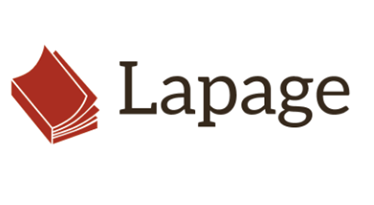

## ETAPE 1: Importation des librairies et chargement des fichiers

In [497]:
#Importations des librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import pingouin as pg
from IPython.display import display_html
from datetime import date
from IPython.display import HTML, display

In [498]:
#Importation du fichier Transactions
transactions = pd.read_csv('transactions.csv', sep=',')
#Importation du fichier products
products = pd.read_csv('products.csv', sep=',')
#Importation du fichier customers
customers = pd.read_csv('customers.csv', sep=',')

## ETAPE 2: Nettoyage et exploration des données

### 2.1)  Exploration du Fichier transactions

In [499]:
transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [500]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [501]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [502]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [503]:
transactions.duplicated().sum()

126

<div style='font-family:Garamond'><div style='font-size: 20px'>
Je remarque qu'il ya 126 doublons dans le fichier transactions mais qu' il ya aucune valeurs manquantes. Je vois aussi qu'au niveau de la colonne date des lignes avec l'intitulé test en plus de la date. Je vais analyser ces lignes test.

In [504]:
print(transactions[transactions['date'].str.contains('test')])
print(transactions[transactions['date'].str.contains('test')].describe())

       id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[200 rows x 4 columns]
       id_prod                             date session_id client_id
count      200                              200        200       200
unique    

<div style='font-family:Garamond'><div style='font-size: 20px'>
En verifiant toutes les lignes qui contiennent les chaines de caractères test, je remarque que ces tests ont tous été effectués a la même date et a la même heure. De plus, ils sont tous de la même session id (s_0) et ont le même id prod (T_0). Je pense qu'il s'agit de lignes test et je décide les supprimer afin de pouvoir convertir ma colonne date en format datetime.   

In [505]:
# Forcer la conversion de la colonne 'date' en chaînes, même si elle contient des valeurs non-chaînes
transactions['date'] = transactions['date'].apply(lambda x: str(x))

# Supprimer les lignes où la colonne 'date' contient 'test'
transactions = transactions[~transactions['date'].str.contains('test', na=False)]

# Faire passer colonne date au format 'datetime'
transactions['date'] = pd.to_datetime(transactions['date'])

# on réaffiche les informations sur la table pour vérifier.
transactions.info()
transactions.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,NaN,342315,8600
top,1_369,NaN,s_118668,c_1609
freq,2252,NaN,14,25488
mean,NaN,2022-03-03 15:13:19.307389696,NaN,NaN
min,NaN,2021-03-01 00:01:07.843138,NaN,NaN
25%,NaN,2021-09-08 09:14:25.055994368,NaN,NaN
50%,NaN,2022-03-03 07:50:20.817730560,NaN,NaN
75%,NaN,2022-08-30 23:57:08.555173888,NaN,NaN
max,NaN,2023-02-28 23:58:30.792755,NaN,NaN


In [506]:
transactions.duplicated().sum()

0

<div style='font-family:Garamond'><div style='font-size: 20px'>
Le dataframe est désormais bien nettoyé, nous n'avons plus de doublons et la colonne date est au bon format (datetime).

### 2.2)  Nettoyage et exploration du Fichier products

In [507]:
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [508]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [509]:
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [510]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [511]:
products.duplicated().sum()

0

In [512]:
products.loc[products['price'] == -1.000000]

,id_prod,price,categ
731,T_0,-1.0,0


<div style='font-family:Garamond'><div style='font-size: 20px'>
Dans le fichier products, nous n'avons aucune valeurs manquantes et aucuns doublons. Cependant je décèle une valeur abérrante au sein du dataframe (price -1.0) et je remarque que ce prix correspond a l'id prod T_0 qui correspond aux lignes test de fichier transactions. Je décide donc de le supprimer.

In [513]:
products = products[products['price'] != -1]

products.describe(include='all')

,id_prod,price,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


<div style='font-family:Garamond'><div style='font-size: 20px'>
Notre dataframe products est désormais bien nettoyé et ne présente plus de valeurs abérrantes. Nous remarquons aussi dans ce dataframe qu'on un delta de 21 valeurs uniques entre le fichier des produits et le fichier des transactions. En effet, nous avons 21 produits qui n'ont jamais été achetés car il ya 3266 transactions uniques pour 3286 produits uniques. Il faudra en tenir compte lors de la jointure des fichiers pour ne pas perdre ces données (21 valeurs produits jamais achetés). 

### 2.3) Nettoyage et exploration du Fichier customers

In [514]:
customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [515]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [516]:
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [517]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [518]:
customers.duplicated().sum()

0

<div style='font-family:Garamond'><div style='font-size: 20px'>
Après exploration du fichier customer, je ne remarque aucune anomalies ni doublons et ni valeurs manquantes. La colonne client_id est la clé primaire du dataframe, le typage des données est verifiés et respectés et l'unicité de la clé primaire est valide. Par contre je vais quand même vérifier si le dataframe ne contient pas d'identifiant correspondant aux lignes test (ct).

In [519]:
customers[customers['client_id'].isin(['ct_0', 'ct_1'])]

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


<div style='font-family:Garamond'><div style='font-size: 20px'>
Et en effet nous avons bien deux lignes correspondant aux id test (ct_0 pour le genre femimin et ct_1 pour le genre masculin).
Je décide donc de les supprimer.

In [520]:
customers = customers[~customers['client_id'].isin(['ct_0', 'ct_1'])]

In [521]:
customers[customers['client_id'].isin(['ct_0', 'ct_1'])]

,client_id,sex,birth


<div style='font-family:Garamond'><div style='font-size: 20px'>
Les lignes test ont bien été supprimés et nous avons un dataframe final sans id test.

## ETAPE 3:  Analyse du chiffre d'affaire et des ventes 

### 3.1) Jointure entre le fichier 'products' et le fichier 'transactions'

<div style='font-family:Garamond'><div style='font-size: 20px'>
Pour analyser le chiffre d'affaires, je vais lier la table des produits à celle des transactions en utilisant une jointure externe ("outer join"). Comme nous l'avons vu, 21 références n'ont jamais été vendues. Cette jointure permettra de conserver ces références et de les inclure dans notre analyse des ventes.

In [522]:
# Jointure
Lapage = pd.merge( products, transactions, on='id_prod', how ='outer')
Lapage

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298
...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131
679349,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167
679350,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453
679351,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098


In [523]:
Lapage.dtypes

id_prod               object
price                float64
categ                float64
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [524]:
Lapage.isnull().sum()

id_prod         0
price         221
categ         221
date           21
session_id     21
client_id      21
dtype: int64

In [525]:
Lapage.duplicated().sum()

0

<div style='font-family:Garamond'><div style='font-size: 20px'>
Nous avons fusionné le dataframe products et transaction pour pouvoir par la suite faire nos analyses de ventes et de chiffres d'affaire. Après fusion, nous avons respectivement 221 valeurs manquantes au niveau de la colonne price et la colonne categ et 21 valeurs manquantes au niveau des colonnes date, session id et client id). Je vais analyser les colonnes contenant des valeurs manquantes.

In [526]:
# Analyse des lignes avec des valeurs manquantes
missing_values = Lapage[Lapage[['categ', 'price']].isnull().any(axis=1)]

display(missing_values.describe(include='all'))

# Analyse des lignes avec des valeurs manquantes dans date
display(Lapage[Lapage['date'].isnull()])

,id_prod,price,categ,date,session_id,client_id
count,221,0.0,0.0,221,221,221
unique,1,NaN,NaN,NaN,221,100
top,0_2245,NaN,NaN,NaN,s_272266,c_1533
freq,221,NaN,NaN,NaN,1,6
mean,NaN,NaN,NaN,2022-02-27 19:52:15.402807808,NaN,NaN
min,NaN,NaN,NaN,2021-03-01 00:09:29.301897,NaN,NaN
25%,NaN,NaN,NaN,2021-09-07 20:55:19.719027968,NaN,NaN
50%,NaN,NaN,NaN,2022-03-25 17:07:45.271508992,NaN,NaN
75%,NaN,NaN,NaN,2022-08-04 19:02:47.712837120,NaN,NaN
max,NaN,NaN,NaN,2023-02-21 04:06:19.106398,NaN,NaN


,id_prod,price,categ,date,session_id,client_id
39705,0_1016,35.06,0.0,NaT,NaN,NaN
62805,0_1780,1.67,0.0,NaT,NaN,NaN
162765,0_1062,20.08,0.0,NaT,NaN,NaN
177522,0_1119,2.99,0.0,NaT,NaN,NaN
181172,0_1014,1.15,0.0,NaT,NaN,NaN
188021,1_0,31.82,1.0,NaT,NaN,NaN
230468,0_1318,20.92,0.0,NaT,NaN,NaN
253465,0_1800,22.05,0.0,NaT,NaN,NaN
290409,0_1645,2.99,0.0,NaT,NaN,NaN
320861,0_322,2.99,0.0,NaT,NaN,NaN


<div style='font-family:Garamond'><div style='font-size: 20px'>
Après avoir effectué la jointure, j'ai remarqué que certaines lignes contiennent des valeurs manquantes, notamment dans les colonnes "catégorie" et "prix". En examinant ces lignes de plus près, il apparaît qu'elles concernent toutes le produit avec l'ID 0_2245. Comme les informations sur le prix et la catégorie sont cruciales, il est nécessaire de remplir ces valeurs.

Pour la colonne "catégorie", sachant que l'ID du produit commence par 0, nous pouvons en déduire que sa catégorie est 0. Nous pourrons donc remplir cette colonne avec cette valeur.

Quant au prix du produit, deux approches sont possibles :

Soit nous attribuons la moyenne des prix des produits de catégorie 0, à condition que les valeurs minimales et maximales de cette catégorie ne soient pas trop éloignées.

Soit nous vérifions si les prix suivent un ordre croissant basé sur les références. Si c'est le cas, nous pourrons assigner un prix supérieur à la référence précédente et inférieur à la suivante.
Enfin, j'ai identifié les lignes avec des valeurs manquantes dans la colonne "date". Il s'agit de 21 références de produits qui n'ont jamais été vendus.

In [527]:
# On cherche la moyenne de la catégorie 0
print('Moyenne prix de la categorie 0 (mean) :')
print(Lapage.loc[Lapage['categ'] == 0, 'price'].describe())

Moyenne prix de la categorie 0 (mean) :
count    415475.000000
mean         10.638330
std           4.933982
min           0.620000
25%           6.290000
50%           9.990000
75%          14.450000
max          40.990000
Name: price, dtype: float64


In [528]:
# Rempalcement des NAN de categ par 0 
Lapage['categ'] = Lapage['categ'].fillna(0)

# remplacer les NaN des prix du produit par la moyenne ( 10.63)
Lapage['price'] = Lapage['price'].fillna(10.63)

# Vérification
print()
print('Vérification des valeurs pour le produit 0_2245')
display(Lapage.loc[Lapage['id_prod']== '0_2245', :])


Vérification des valeurs pour le produit 0_2245


,id_prod,price,categ,date,session_id,client_id
679132,0_2245,10.63,0.0,2022-09-23 07:22:38.636773,s_272266,c_4746
679133,0_2245,10.63,0.0,2022-07-23 09:24:14.133889,s_242482,c_6713
679134,0_2245,10.63,0.0,2022-12-03 03:26:35.696673,s_306338,c_5108
679135,0_2245,10.63,0.0,2021-08-16 11:33:25.481411,s_76493,c_1391
679136,0_2245,10.63,0.0,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...,...,...
679348,0_2245,10.63,0.0,2021-08-25 09:06:03.504061,s_80395,c_131
679349,0_2245,10.63,0.0,2022-03-06 19:59:19.462288,s_175311,c_4167
679350,0_2245,10.63,0.0,2022-05-16 11:35:20.319501,s_209381,c_4453
679351,0_2245,10.63,0.0,2022-02-11 09:05:43.952857,s_163405,c_1098


In [529]:
Lapage.isnull().sum()

id_prod        0
price          0
categ          0
date          21
session_id    21
client_id     21
dtype: int64

<div style='font-family:Garamond'><div style='font-size: 20px'>
Il ne reste plus que les valeurs manquantes concernant les 21 références qui n'ont jamais été vendues. Nous pouvons donc passer à l'analyse des ventes et du chiffre d'affaires.

### 3.2) Indicateurs et graphiques autour du chiffre d'affaires

<div style='font-family:Garamond'><div style='font-size: Chiffre d'affaire total 

#### <div style="font-family: 'Garamond', serif; font-size: 24px; color: #333333; text-align: center;">Chiffre d'affaire et vente total :</div>

In [530]:
CA_TOTAL = Lapage['price'].sum()
VENTE_TOTAL = Lapage['date'].count()
print('CA =', CA_TOTAL)
print ('Vente =', VENTE_TOTAL)

CA = 11856873.190000001
Vente = 679332


<div style="font-family:Garamond"> <div style="font-size: 20px">
Je vais vérifier si parmi nos clients certains sont professionnels (bibliothèques, écoles), ce sont dans le jargon marketing les clients btob.

In [531]:
#Calculer la somme totale du ca  des clients btob et proportion par rapport au ca total
ca_par_client = Lapage.groupby('client_id')['price'].sum().reset_index()
ca_par_client.sort_values(by='price', ascending=False)

# Liste des clients B2B
clients_btob = ['c_1609', 'c_4958', 'c_6714', 'c_3454']

# Filtrer les clients B2B dans le DataFrame
b2b_clients_df = Lapage[Lapage['client_id'].isin(clients_btob)]

# Somme du CA des clients B2B
ca_b2b_total = b2b_clients_df['price'].sum()

# Calcul de la proportion par rapport au ca total
proportion_b2b = ca_b2b_total / CA_TOTAL * 100

# Afficher les résultats
print(f"La somme totale du chiffre d'affaires des clients B2B est de {ca_b2b_total} euros et représente {proportion_b2b.round(2)}% du chiffre d'affaires total.")

La somme totale du chiffre d'affaires des clients B2B est de 881126.21 euros et représente 7.43% du chiffre d'affaires total.


In [532]:
#nombres de livres vendus aux clients btob et proportion de produits vendus par rapport au total de produits vendus

# Calculer le nombre total de livres vendus aux clients B2B
livres_b2b_total = b2b_clients_df['date'].count()


# Calculer la proportion des livres vendus aux clients B2B par rapport au total
proportion_livres_b2b = livres_b2b_total / VENTE_TOTAL * 100

# Afficher les résultats
print(f"Le nombre total de livres vendus aux clients B2B est de {livres_b2b_total} et représente {proportion_livres_b2b.round(2)}% du total des livres vendus.")

Le nombre total de livres vendus aux clients B2B est de 46643 et représente 6.87% du total des livres vendus.


<div style="font-family:Garamond"> <div style="font-size: 20px">

Quatre clients (c_1609, c_4958, c_6714, c_3454) génèrent une part significative du chiffre d'affaires global, représentant à eux seuls 7,43 %. Il est probable qu'ils soient des professionnels, tels que des bibliothèques ou des écoles, effectuant de grosses commandes. Ce sont nos fameux clients btob qui générent aussi 6,87% du nombres total de livres vendus (part non négligeable).

### <div style="font-family: 'Garamond', serif; font-size: 24px; color: #333333; text-align: center;">Chiffre d'affaire et vente par années :</div>

In [533]:
# Chiffre d'affaire année 1 (sur 12 mois à partir du 1 er mois d'analyse 01/03/21 au 31/02/2022). 
CA_ANNEE_1 = Lapage.loc[(Lapage['date'] >= '2021-03-01') & (Lapage['date'] < '2022-03-01'), 'price'].sum().round(2)
# Nombre de vente année 1 
VENTES_ANNEE_1 = Lapage.loc[(Lapage['date'] >= '2021-03-01') & (Lapage['date'] < '2022-03-01'), 'date'].count()

# Chiffre d'affaire année 2 (sur 12 mois à partir du 1 er mois d'analyse 01/03/22 au 28/02/2023 inclus).
CA_ANNEE_2 = Lapage.loc[(Lapage['date'] >= '2022-03-01') & (Lapage['date'] < '2023-03-01'), 'price'].sum().round(2)
# Nombre de vente année 2
VENTES_ANNEE_2 = Lapage.loc[(Lapage['date'] >= '2022-03-01') & (Lapage['date'] < '2023-03-01'), 'date'].count()

# Taux d'evolution CA entre année 1 et 2.
TX_EVOLUTION_CA_ANNEE1_ANNEE2 = (Lapage.loc[(Lapage['date'] >= '2022-03-01') & (Lapage['date'] < '2023-03-01'), 'price'].sum()
 - Lapage.loc[(Lapage['date'] >= '2021-03-01') & (Lapage['date'] < '2022-03-01'), 'price'].sum()
)/Lapage.loc[(Lapage['date'] >= '2022-03-01') & (Lapage['date'] < '2023-03-01'), 'price'].sum()
TX_EVOLUTION_CA_ANNEE1_ANNEE2 = TX_EVOLUTION_CA_ANNEE1_ANNEE2.round(2)
# Taux d'evolution ventes entre année 1 et 2.
TX_EVOLUTION_VENTES_ANNEE1_ANNEE2 = (Lapage.loc[(Lapage['date'] >= '2022-03-01') & (Lapage['date'] < '2023-03-01'), 'date'].count()
 - Lapage.loc[(Lapage['date'] >= '2021-03-01') & (Lapage['date'] < '2022-03-01'), 'date'].count()
)/Lapage.loc[(Lapage['date'] >= '2021-03-01') & (Lapage['date'] < '2022-03-01'), 'date'].count()
TX_EVOLUTION_VENTES_ANNEE1_ANNEE2 = TX_EVOLUTION_VENTES_ANNEE1_ANNEE2.round(2)
print('Année 1 ( 01/03/21 au 28/02/2022)')
print()
print('- C.A =', CA_ANNEE_1, '€')
print('- Nombre de vente =', VENTES_ANNEE_1)
print()
print('Année 2 ( 01/03/22 au 28/02/2023)')
print()
print('- C.A =', CA_ANNEE_2, '€')
print('- Nombre de vente =', VENTES_ANNEE_2)
print()
print('Evolution :')
print('- +',TX_EVOLUTION_CA_ANNEE1_ANNEE2, '% de C.A')
print('- +', TX_EVOLUTION_VENTES_ANNEE1_ANNEE2, '% de vente')

Année 1 ( 01/03/21 au 28/02/2022)

- C.A = 5832831.94 €
- Nombre de vente = 337288

Année 2 ( 01/03/22 au 28/02/2023)

- C.A = 6023245.97 €
- Nombre de vente = 342044

Evolution :
- + 0.03 % de C.A
- + 0.01 % de vente


<div style="font-family:Garamond"> <div style="font-size: 20px">
    
**Sur les deux années :**
    
- Chiffre d'affaire : 11 856 873.19 €
- Nombre de ventes : 679 332.
    
**Evolution par années :**
    
- **Année 1** : C.A = 5 832 831.94 €, Nombre de vente = 337 288.
- **Année 2** : C.A = 6 023 245.97 €, Nombre de vente = 342 044.
    
**Evolution :**
- +0.03 % de C.A
- +0.01 % de vente

    
</div>

### <div style="font-family: 'Garamond', serif; font-size: 24px; color: #333333; text-align: center;">Chiffre d'affaire et vente par mois :</div>

<div style="font-family:Garamond"> <div style="font-size: 20px">
Pour effectuer ces calculs, je vais ajouter deux colonnes à notre DataFrame pour indiquer le mois et l'année de la transaction. Ensuite, je créerai deux nouvelles tables : l'une montrant le chiffre d'affaires par mois et l'autre présentant les ventes par mois.

In [534]:
# Rajout des colonnes année et mois.
Lapage["année"] = Lapage["date"].dt.year
Lapage["mois"] = Lapage["date"].dt.month
# Création des DF avec CA et ventes trié par mois de chaque années
CAparmois = Lapage.groupby(["année","mois"])["price"].sum()
Venteparmois = Lapage.groupby(["année","mois"])["date"].count()

print("Chiffre d'affaire par mois")
display(CAparmois)
print("Ventes par mois")
display(Venteparmois)

Chiffre d'affaire par mois


année   mois
2021.0  3.0     482536.28
        4.0     476258.12
        5.0     493028.51
        6.0     484162.97
        7.0     482877.92
        8.0     482380.46
        9.0     507368.24
        10.0    320873.15
        11.0    516274.03
        12.0    525991.69
2022.0  1.0     525392.14
        2.0     535688.43
        3.0     515573.46
        4.0     493147.76
        5.0     517302.68
        6.0     496090.53
        7.0     510910.68
        8.0     506552.31
        9.0     494210.20
        10.0    508024.07
        11.0    496781.87
        12.0    510283.28
2023.0  1.0     517614.96
        2.0     456754.17
Name: price, dtype: float64

Ventes par mois


année   mois
2021.0  3.0     28610
        4.0     28457
        5.0     28293
        6.0     26857
        7.0     24742
        8.0     25659
        9.0     33326
        10.0    21606
        11.0    28321
        12.0    32464
2022.0  1.0     29348
        2.0     29605
        3.0     29707
        4.0     27616
        5.0     29991
        6.0     28511
        7.0     28682
        8.0     28552
        9.0     28315
        10.0    28974
        11.0    28574
        12.0    28625
2023.0  1.0     28945
        2.0     25552
Name: date, dtype: int64

In [535]:
Lapage

,id_prod,price,categ,date,session_id,client_id,année,mois
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,2022.0,2.0
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364,2022.0,11.0
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544,2021.0,9.0
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025,2023.0,1.0
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298,2021.0,8.0
...,...,...,...,...,...,...,...,...
679348,0_2245,10.63,0.0,2021-08-25 09:06:03.504061,s_80395,c_131,2021.0,8.0
679349,0_2245,10.63,0.0,2022-03-06 19:59:19.462288,s_175311,c_4167,2022.0,3.0
679350,0_2245,10.63,0.0,2022-05-16 11:35:20.319501,s_209381,c_4453,2022.0,5.0
679351,0_2245,10.63,0.0,2022-02-11 09:05:43.952857,s_163405,c_1098,2022.0,2.0


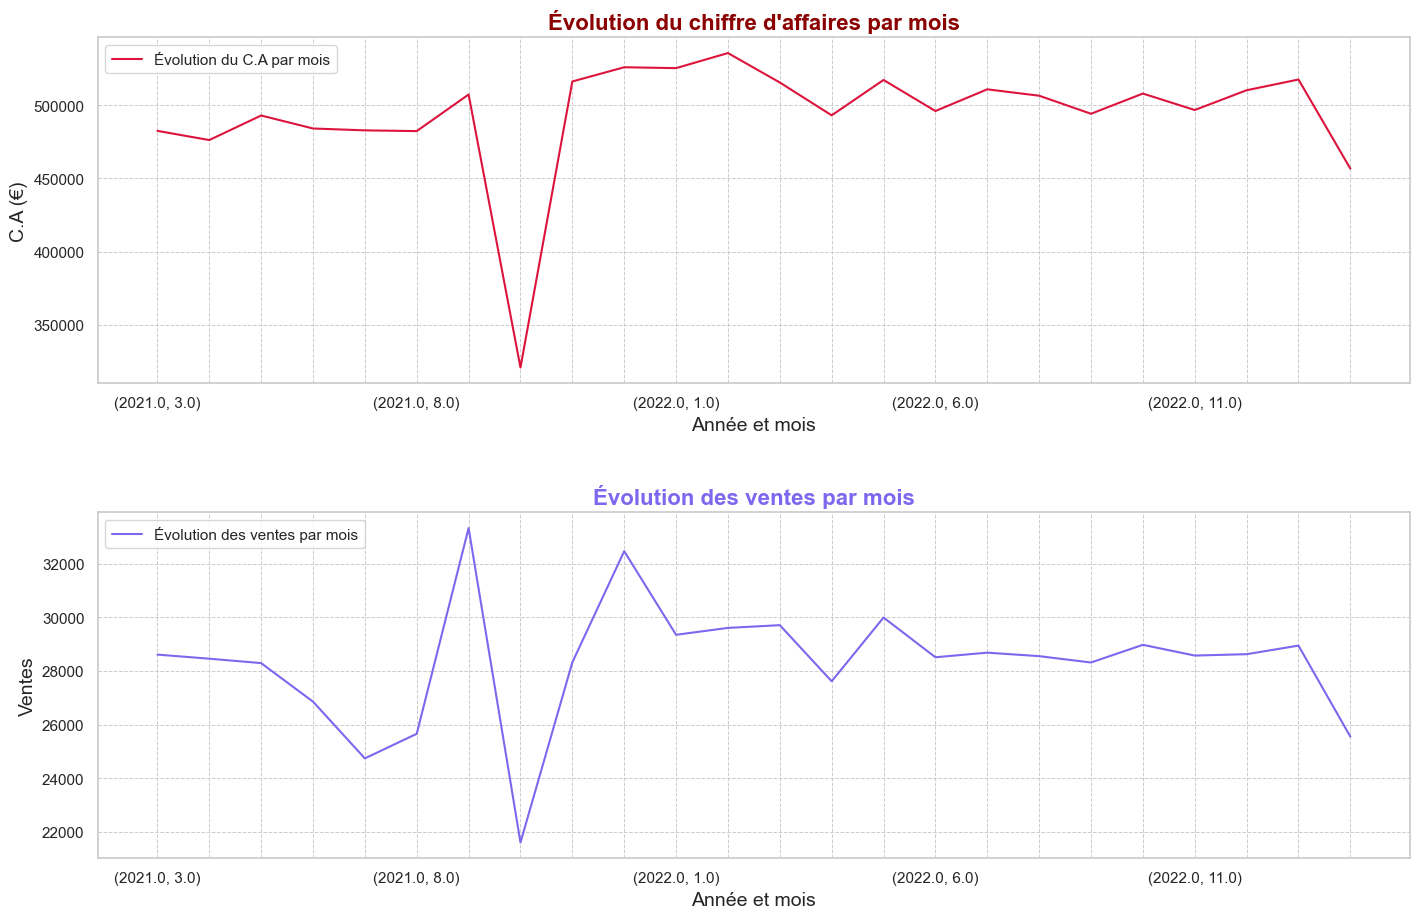

In [536]:
# Définir le style Seaborn pour améliorer l'esthétique
sns.set(style="whitegrid", palette="muted")

# Initialiser la figure avec une taille adaptée
plt.figure(figsize=(15, 10))

# Premier sous-graphe : Evolution du chiffre d'affaires par mois
plt.subplot(2, 1, 1)
CAparmois.plot(c='crimson', lw=1.5, label='Évolution du C.A par mois')
plt.title('Évolution du chiffre d\'affaires par mois', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Année et mois', fontsize=14)
plt.ylabel('C.A (€)', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend(loc='upper left')

# Deuxième sous-graphe : Evolution des ventes par mois
plt.subplot(2, 1, 2)
Venteparmois.plot(c='mediumslateblue', lw=1.5, label='Évolution des ventes par mois')
plt.title('Évolution des ventes par mois', fontsize=16, fontweight='bold', color='mediumslateblue')
plt.xlabel('Année et mois', fontsize=14)
plt.ylabel('Ventes', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend(loc='upper left')

# Ajustement de l'espacement entre les sous-graphes
plt.tight_layout(pad=3.0)

# Afficher le graphique
plt.savefig('Evolutioncaetventeparmois2')
plt.show()

<div style="font-family:Garamond"> <div style="font-size: 20px">

Premièrement, on remarque une baisse importante et brusque du CA. et des ventes pour le mois d'octobre 2021. Nous allons dans un premier temps faire notre analyse des ventes et du CA. par mois par catégories puis nous zoomerons sur le mois d'octobre 2021 afin de comprendre ce qui s'y passe.

On peut voir que sauf pour le mois d'octobre 2021 l'évolution du CA. reste plutôt stables. Le montant des ventes peut varier de manière plus importante, mais ne semble pas influencer le résultat en termes de chiffre d'affaires.   
    </div>

### <div style="font-family: 'Garamond', serif; font-size: 24px; color: #333333; text-align: center;">Moyenne mobile du CA par mois et des ventes

<div style="font-family:Garamond"> <div style="font-size: 20px">
Nous allons à présent visualiser une moyenne mobile de l'évolution du chiffre d'affaires et des ventes mensuelles, afin de dégager une tendance plus globale.

In [537]:
# Création d'une table avec le CA par mois.
CA_PAR_MOIS_RESAMPLE = Lapage
CA_PAR_MOIS_RESAMPLE.set_index("date", inplace = True)
CA_PAR_MOIS_RESAMPLE = CA_PAR_MOIS_RESAMPLE.drop(['id_prod', 'categ', 'session_id', 'client_id', 'année', 'mois'], axis=1)
CA_PAR_MOIS_RESAMPLE = CA_PAR_MOIS_RESAMPLE.resample('M').sum()
CA_PAR_MOIS_RESAMPLE = CA_PAR_MOIS_RESAMPLE.rename(columns={'price': 'C.A'})
# Calcul de la moyenne mobile pour le CA par mois
MOYENNE_MOBILE_CA_PAR_MOIS_RESAMPLE = CA_PAR_MOIS_RESAMPLE.rolling(window=2).mean()

# Création d'une table avec les ventes par mois.
VENTE_PAR_MOIS_RESAMPLE = Lapage
VENTE_PAR_MOIS_RESAMPLE = VENTE_PAR_MOIS_RESAMPLE.drop(['id_prod', 'categ', 'session_id', 'client_id', 'année', 'mois',], axis=1)
VENTE_PAR_MOIS_RESAMPLE = VENTE_PAR_MOIS_RESAMPLE.resample('M').count()
VENTE_PAR_MOIS_RESAMPLE = VENTE_PAR_MOIS_RESAMPLE.rename(columns={'price': 'Ventes'})
# Calcul de la moyenne mobile pour les ventes par mois
MOYENNE_MOBILE_VENTE_PAR_MOIS_RESAMPLE = VENTE_PAR_MOIS_RESAMPLE.rolling(window=2).mean()

In [538]:
CA_PAR_MOIS_RESAMPLE

,C.A
date,
2021-03-31,482536.28
2021-04-30,476258.12
2021-05-31,493028.51
2021-06-30,484162.97
2021-07-31,482877.92
2021-08-31,482380.46
2021-09-30,507368.24
2021-10-31,320873.15
2021-11-30,516274.03


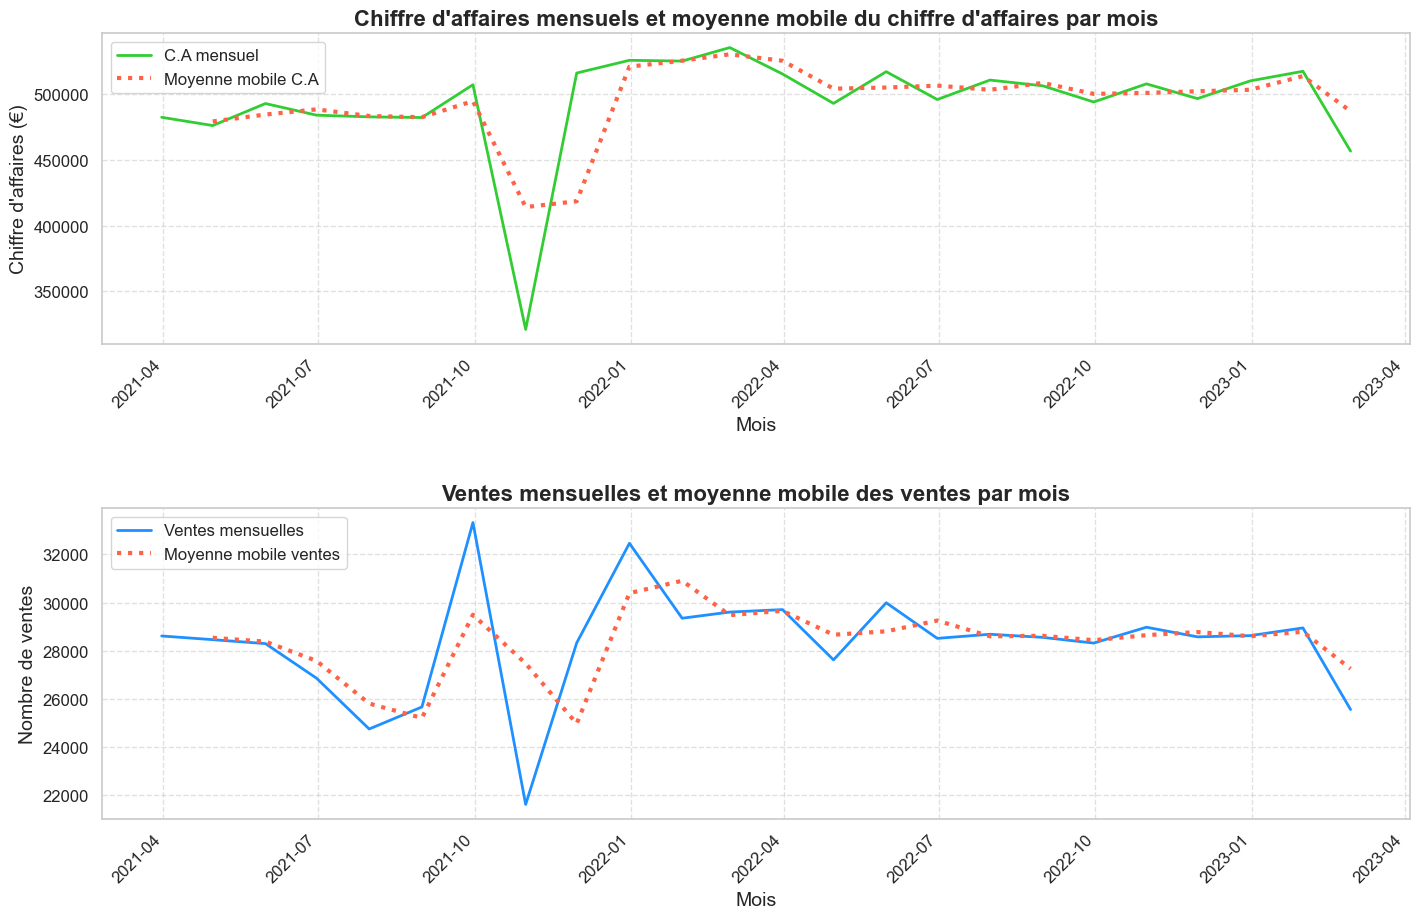

In [539]:
# Initialiser la figure et les sous-graphiques
plt.figure(figsize=(15, 10))

# Premier sous-graphe : Moyenne et moyenne mobile du C.A par mois
plt.subplot(2, 1, 1)
plt.plot(CA_PAR_MOIS_RESAMPLE.index, CA_PAR_MOIS_RESAMPLE['C.A'], c='limegreen', lw=2, label='C.A mensuel')
plt.plot(MOYENNE_MOBILE_CA_PAR_MOIS_RESAMPLE.index, MOYENNE_MOBILE_CA_PAR_MOIS_RESAMPLE['C.A'], c='tomato', ls=':', lw=3, label='Moyenne mobile C.A')
plt.title("Chiffre d'affaires mensuels et moyenne mobile du chiffre d\'affaires par mois", fontsize=16, fontweight='bold')
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Chiffre d\'affaires (€)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=12)

# Améliorer les ticks des axes
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Deuxième sous-graphe : Moyenne et moyenne mobile des ventes par mois
plt.subplot(2, 1, 2)
plt.plot(VENTE_PAR_MOIS_RESAMPLE.index, VENTE_PAR_MOIS_RESAMPLE['Ventes'], c='dodgerblue', lw=2, label='Ventes mensuelles')
plt.plot(MOYENNE_MOBILE_VENTE_PAR_MOIS_RESAMPLE.index, MOYENNE_MOBILE_VENTE_PAR_MOIS_RESAMPLE['Ventes'], c='tomato', ls=':', lw=3, label='Moyenne mobile ventes')
plt.title('Ventes mensuelles et moyenne mobile des ventes par mois', fontsize=16, fontweight='bold')
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Nombre de ventes', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=12)

# Améliorer les ticks des axes
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Ajustement des espacements entre les sous-graphiques
plt.tight_layout(pad=3.0)

# Afficher les graphiques
plt.savefig('EvolutioncaetventeparmoisMOYENNEMOBILE')
plt.show()

<div style="font-family:Garamond"> <div style="font-size: 20px">
En observant la courbe de la moyenne mobile, le chiffre d'affaire oscille autour des 500000 euros sur une periode de deux ans. Le nombre de ventes des livres est en moyenne autour des 28000 livres vendus sur deux ans aussi.
    </div>

 ### <div style="font-family: 'Garamond', serif; font-size: 24px; color: #333333; text-align: center;"> Chiffre d'affaire et volume de vente par mois par catégorie. </div>

In [540]:
Lapage

,id_prod,price,categ,session_id,client_id,année,mois
date,,,,,,,
2022-02-20 17:04:37.204937,0_1421,19.99,0.0,s_168213,c_6389,2022.0,2.0
2022-11-19 03:42:20.707442,0_1421,19.99,0.0,s_299590,c_8364,2022.0,11.0
2021-09-19 14:58:46.726179,0_1421,19.99,0.0,s_92304,c_3544,2021.0,9.0
2023-01-11 16:04:24.367855,0_1421,19.99,0.0,s_325369,c_1025,2023.0,1.0
2021-08-01 19:33:18.877168,0_1421,19.99,0.0,s_70071,c_2298,2021.0,8.0
...,...,...,...,...,...,...,...
2021-08-25 09:06:03.504061,0_2245,10.63,0.0,s_80395,c_131,2021.0,8.0
2022-03-06 19:59:19.462288,0_2245,10.63,0.0,s_175311,c_4167,2022.0,3.0
2022-05-16 11:35:20.319501,0_2245,10.63,0.0,s_209381,c_4453,2022.0,5.0


In [541]:
# Creation DF specifique C.A par categories
CA_PAR_MOIS_PAR_CATEGORIES = Lapage[["categ", "price", "année", "mois"]]
CA_PAR_MOIS_PAR_CATEGORIES = pd.pivot_table(CA_PAR_MOIS_PAR_CATEGORIES, index=["année","mois"], columns=["categ"], aggfunc=["sum"]).reset_index()
CA_PAR_MOIS_PAR_CATEGORIES.columns = ["année", "mois", "catégorie 0", "catégorie 1", "catégorie 2"]
CA_PAR_MOIS_PAR_CATEGORIES.set_index("mois", inplace = True)

# Creation DF specifique Ventes par categories
VENTES_PAR_MOIS_PAR_CATEGORIES = Lapage[["categ", "price", "année", "mois"]]
VENTES_PAR_MOIS_PAR_CATEGORIES = pd.pivot_table(VENTES_PAR_MOIS_PAR_CATEGORIES, index=["année","mois"], columns=["categ"], aggfunc=["count"]).reset_index()
VENTES_PAR_MOIS_PAR_CATEGORIES.columns = ["année", "mois", "catégorie 0", "catégorie 1", "catégorie 2"]
VENTES_PAR_MOIS_PAR_CATEGORIES.set_index("mois", inplace = True)

<Figure size 1400x600 with 0 Axes>

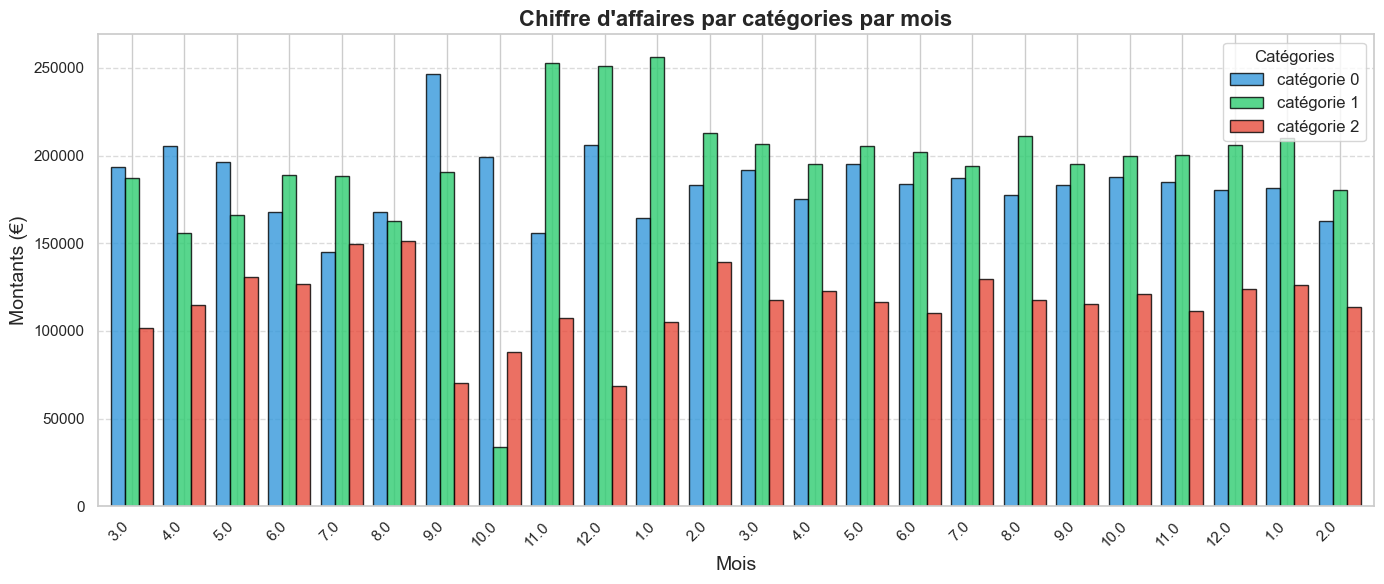

In [542]:
# Définir le style Seaborn pour une meilleure visualisation
sns.set(style="whitegrid")

# Initialiser la figure
plt.figure(figsize=(14, 6))

# Tracer un graphique pour chaque catégorie avec un style plus esthétique
CA_PAR_MOIS_PAR_CATEGORIES[['catégorie 0', 'catégorie 1', 'catégorie 2']].plot(kind='bar', 
    stacked=False, 
    width=0.8, 
    color=['#3498db', '#2ecc71', '#e74c3c'], 
    alpha=0.8,
    figsize=(14, 6),
    edgecolor='black')

# Ajouter des légendes
plt.legend(title="Catégories", loc='upper right', fontsize=12)

# Personnaliser les labels des axes
plt.xlabel("Mois", fontsize=14)
plt.ylabel("Montants (€)", fontsize=14)
plt.title("Chiffre d'affaires par catégories par mois", fontsize=16, fontweight='bold')

# Améliorer l'apparence des ticks sur l'axe des x
plt.xticks(rotation=45, ha='right')

# Ajouter des bordures aux barres
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Supprimer la bordure supérieure et droite pour un style plus net
#sns.despine()

# Sauvegarder l'image
plt.savefig('Chiffreaffairesparcatégoriesparmois.png', dpi=300)

# Afficher le graphique
plt.tight_layout()
plt.show()


<div style="font-family:Garamond"> <div style="font-size: 20px">
Grâce à ce graphique, on observe que la catégorie 1 contribue le plus au chiffre d'affaires, suivie de près par la catégorie 0. La catégorie 2, quant à elle, est nettement en dessous, sauf en août 2021 où les trois catégories sont presque au même niveau.

De mars à août 2021, la catégorie 2 connaît une hausse continue avant de chuter brutalement en septembre. Par la suite, elle génère un chiffre d'affaires plus faible, se stabilisant autour des 100 000 € jusqu'en février 2022.

La catégorie 1 réalise de bons résultats entre novembre 2021 et janvier 2022, probablement en raison des fêtes de Noël. Cependant, cette hausse ne se répète pas l'année suivante, soulevant des questions sur les stocks, les références produits ou la communication.

En septembre 2021, la catégorie 0 dépasse la catégorie 1, potentiellement liée à la période des manuels scolaires. Comme pour la catégorie 1, ce pic ne se reproduit pas l'année suivante.

À partir de février 2022, le chiffre d'affaires de chaque catégorie devient stable jusqu'à la fin de l'analyse en février 2023.

Enfin, on note une baisse du chiffre d'affaires en octobre 2021, mais uniquement pour la catégorie 1, point qui mérite une analyse plus approfondie.

In [543]:
Lapage = Lapage.reset_index()
Lapage

,date,id_prod,price,categ,session_id,client_id,année,mois
0,2022-02-20 17:04:37.204937,0_1421,19.99,0.0,s_168213,c_6389,2022.0,2.0
1,2022-11-19 03:42:20.707442,0_1421,19.99,0.0,s_299590,c_8364,2022.0,11.0
2,2021-09-19 14:58:46.726179,0_1421,19.99,0.0,s_92304,c_3544,2021.0,9.0
3,2023-01-11 16:04:24.367855,0_1421,19.99,0.0,s_325369,c_1025,2023.0,1.0
4,2021-08-01 19:33:18.877168,0_1421,19.99,0.0,s_70071,c_2298,2021.0,8.0
...,...,...,...,...,...,...,...,...
679348,2021-08-25 09:06:03.504061,0_2245,10.63,0.0,s_80395,c_131,2021.0,8.0
679349,2022-03-06 19:59:19.462288,0_2245,10.63,0.0,s_175311,c_4167,2022.0,3.0
679350,2022-05-16 11:35:20.319501,0_2245,10.63,0.0,s_209381,c_4453,2022.0,5.0
679351,2022-02-11 09:05:43.952857,0_2245,10.63,0.0,s_163405,c_1098,2022.0,2.0


### <div style="font-family: 'Garamond', serif; font-size: 24px; color: #333333; text-align: center;">Analyse d'octobre 2021</div>


In [544]:
# on rajoute une colonne avec les informations sur le jour
Lapage['jour'] = Lapage['date'].dt.day

#Création du DF C.A pour octobre.
CA_JOURNALIER_OCTOBRE2021_CATEGORIE = Lapage.loc[(Lapage["année"] == 2021) & (Lapage["mois"] == 10),:]
CA_JOURNALIER_OCTOBRE2021_CATEGORIE = CA_JOURNALIER_OCTOBRE2021_CATEGORIE[["categ", "price","jour"]]
CA_JOURNALIER_OCTOBRE2021_CATEGORIE = pd.pivot_table(CA_JOURNALIER_OCTOBRE2021_CATEGORIE, index=["jour"], columns=["categ"], aggfunc=["sum"])
CA_JOURNALIER_OCTOBRE2021_CATEGORIE.columns = ["catégorie 0", "catégorie 1", "catégorie 2"]
# remplacer les NaN par des 0
CA_JOURNALIER_OCTOBRE2021_CATEGORIE['catégorie 1'] = CA_JOURNALIER_OCTOBRE2021_CATEGORIE['catégorie 1'].fillna(0)
    
#Création du DF ventes pour octobre.
VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE = Lapage.loc[(Lapage["année"] == 2021) & (Lapage["mois"] == 10),:]
VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE = VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE[["categ", "price","jour"]]
VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE = pd.pivot_table(VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE, index=["jour"], columns=["categ"], aggfunc=["count"])
VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE.columns = ["catégorie 0", "catégorie 1", "catégorie 2"]
# remplacer les NaN par des 0
VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE['catégorie 1'] = VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE['catégorie 1'].fillna(0)

In [545]:
Lapage

,date,id_prod,price,categ,session_id,client_id,année,mois,jour
0,2022-02-20 17:04:37.204937,0_1421,19.99,0.0,s_168213,c_6389,2022.0,2.0,20.0
1,2022-11-19 03:42:20.707442,0_1421,19.99,0.0,s_299590,c_8364,2022.0,11.0,19.0
2,2021-09-19 14:58:46.726179,0_1421,19.99,0.0,s_92304,c_3544,2021.0,9.0,19.0
3,2023-01-11 16:04:24.367855,0_1421,19.99,0.0,s_325369,c_1025,2023.0,1.0,11.0
4,2021-08-01 19:33:18.877168,0_1421,19.99,0.0,s_70071,c_2298,2021.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...
679348,2021-08-25 09:06:03.504061,0_2245,10.63,0.0,s_80395,c_131,2021.0,8.0,25.0
679349,2022-03-06 19:59:19.462288,0_2245,10.63,0.0,s_175311,c_4167,2022.0,3.0,6.0
679350,2022-05-16 11:35:20.319501,0_2245,10.63,0.0,s_209381,c_4453,2022.0,5.0,16.0
679351,2022-02-11 09:05:43.952857,0_2245,10.63,0.0,s_163405,c_1098,2022.0,2.0,11.0


In [546]:
CA_JOURNALIER_OCTOBRE2021_CATEGORIE

,catégorie 0,catégorie 1,catégorie 2
jour,,,
1.0,6950.50,7003.79,3104.05
2.0,7141.01,0.00,2041.12
3.0,6786.57,0.00,2206.48
4.0,6554.86,0.00,2746.08
5.0,6357.91,0.00,3032.55
6.0,7546.58,0.00,1944.11
7.0,6404.01,0.00,1787.07
8.0,7069.53,0.00,3137.82
9.0,6808.69,0.00,2616.67


In [547]:
VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE

,catégorie 0,catégorie 1,catégorie 2
jour,,,
1.0,663.0,344.0,38.0
2.0,661.0,0.0,28.0
3.0,648.0,0.0,31.0
4.0,603.0,0.0,38.0
5.0,594.0,0.0,38.0
6.0,702.0,0.0,26.0
7.0,597.0,0.0,26.0
8.0,669.0,0.0,44.0
9.0,640.0,0.0,35.0


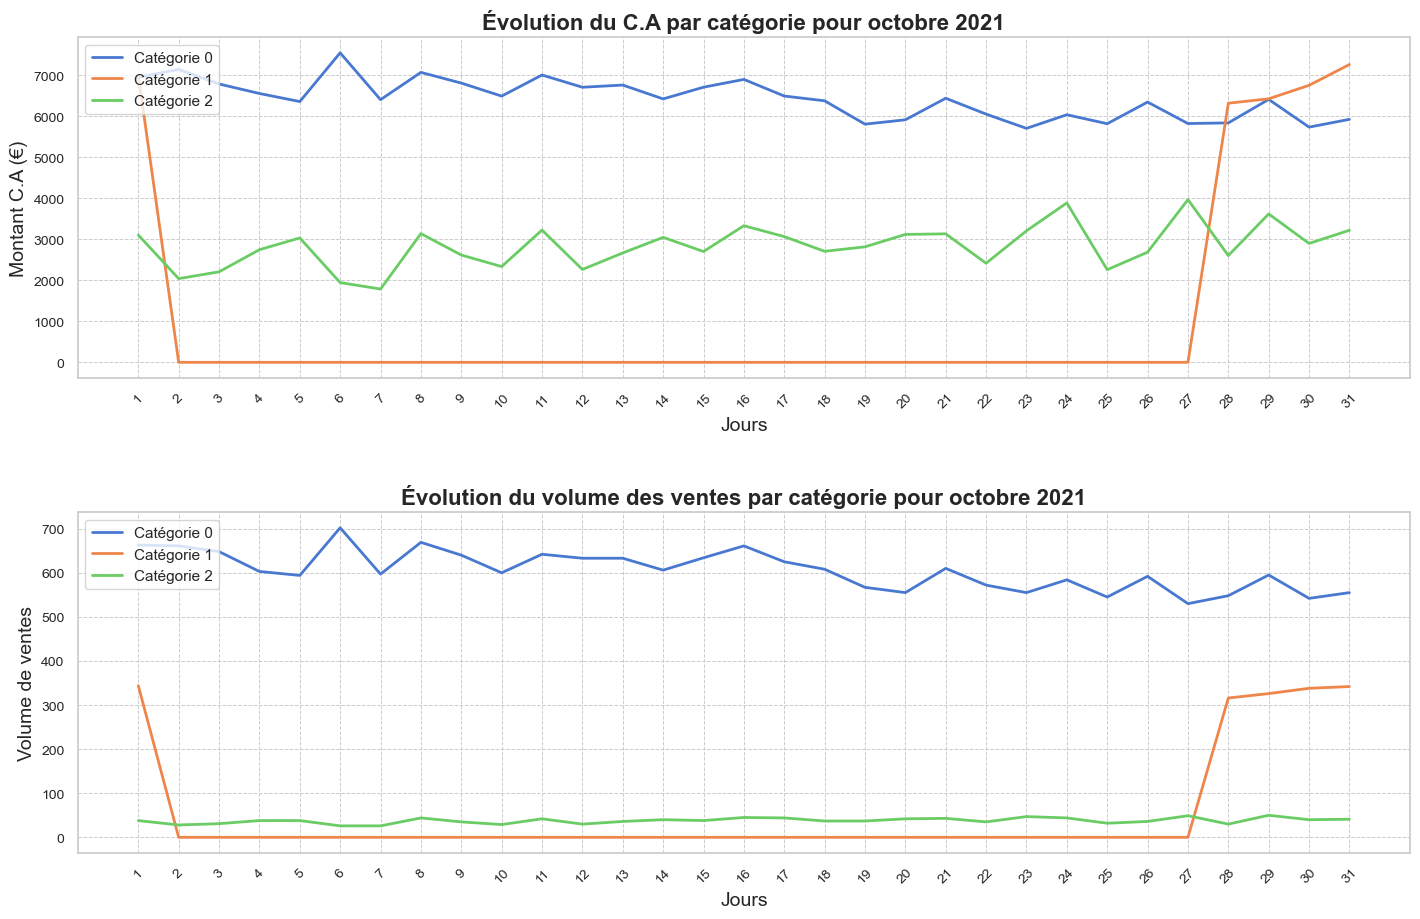

In [548]:
# Définir le style Seaborn pour améliorer l'esthétique
sns.set(style="whitegrid", palette="muted")

# Initialiser la figure avec une taille adaptée
plt.figure(figsize=(15, 10))

# Premier sous-graphe : Evolution du chiffre d'affaires par catégorie pour octobre 2021
plt.subplot(2, 1, 1)
plt.plot(CA_JOURNALIER_OCTOBRE2021_CATEGORIE.index, CA_JOURNALIER_OCTOBRE2021_CATEGORIE['catégorie 0'], label='Catégorie 0', linewidth=2)
plt.plot(CA_JOURNALIER_OCTOBRE2021_CATEGORIE.index, CA_JOURNALIER_OCTOBRE2021_CATEGORIE['catégorie 1'], label='Catégorie 1', linewidth=2)
plt.plot(CA_JOURNALIER_OCTOBRE2021_CATEGORIE.index, CA_JOURNALIER_OCTOBRE2021_CATEGORIE['catégorie 2'], label='Catégorie 2', linewidth=2)
plt.title('Évolution du C.A par catégorie pour octobre 2021', fontsize=16, fontweight='bold')
plt.xlabel('Jours', fontsize=14)
plt.ylabel('Montant C.A (€)', fontsize=14)
plt.xticks(ticks=range(1, 32), fontsize=10, rotation=45)  # Ajuster les ticks pour chaque jour du mois
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend(loc='upper left')

# Deuxième sous-graphe : Evolution volume des ventes par catégorie pour octobre 2021
plt.subplot(2, 1, 2)
plt.plot(VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE.index, VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE['catégorie 0'], label='Catégorie 0', linewidth=2)
plt.plot(VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE.index, VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE['catégorie 1'], label='Catégorie 1', linewidth=2)
plt.plot(VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE.index, VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE['catégorie 2'], label='Catégorie 2', linewidth=2)
plt.title('Évolution du volume des ventes par catégorie pour octobre 2021', fontsize=16, fontweight='bold')
plt.xlabel('Jours', fontsize=14)
plt.ylabel('Volume de ventes', fontsize=14)
plt.xticks(ticks=range(1, 32), fontsize=10, rotation=45)  # Ajuster les ticks pour chaque jour du mois
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend(loc='upper left')

# Ajustement de l'espacement entre les sous-graphes
plt.tight_layout(pad=3.0)

# Sauvegarder l'image
plt.savefig('EvolutionCAetVentesOctobre2021.png', dpi=300)

# Afficher le graphique
plt.show()


In [549]:
# Convertir les DataFrames en HTML
html_ca = CA_JOURNALIER_OCTOBRE2021_CATEGORIE.to_html()
html_vente = VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE.to_html()

# Afficher les DataFrames côte à côte avec titres centrés
display(HTML(f"""
<table style="width:100%; border-spacing: 20px;">
  <tr>
    <td style="width:50%; text-align:center;">
      <h3 style="text-align:left;">Chiffre d'Affaires</h3>
      {html_ca}
    </td>
    <td style="width:50%; text-align:center;">
      <h3 style="text-align:left;">Volume des Ventes</h3>
      {html_vente}
    </td>
  </tr>
</table>
"""))

,catégorie 0,catégorie 1,catégorie 2
jour,,,
1.0,6950.50,7003.79,3104.05
2.0,7141.01,0.00,2041.12
3.0,6786.57,0.00,2206.48
4.0,6554.86,0.00,2746.08
5.0,6357.91,0.00,3032.55
6.0,7546.58,0.00,1944.11
7.0,6404.01,0.00,1787.07
8.0,7069.53,0.00,3137.82
9.0,6808.69,0.00,2616.67


### Hypothèses pour l'Absence de Résultats de la Catégorie 1 (2 octobre 2021 au 27 octobre 2021)

1. **Problème Informatique**  
   Il est possible qu'un problème technique ait empêché les clients d'acheter des livres de la catégorie 1. Peut-être qu'un employé a accidentellement mis tous les livres de cette catégorie en indisponible.

2. **Problèmes de Disponibilité du Site**  
   La section du site proposant les livres de la catégorie 1 était-elle hors ligne durant cette période ? Cela aurait pu empêcher les clients de trouver et d'acheter ces livres. Une restructuration ou une maintenance du site pourrait en être la cause.

3. **Problème de Stock**  
   Les problèmes de stock pourraient être une autre explication. Les fournisseurs de livres de la catégorie 1 ont-ils été en mesure de fournir les produits à la librairie pendant cette période ?

4. **Erreur d’Enregistrement des Ventes**  
   Il est également possible qu'un bug ait causé une absence d'enregistrement des ventes pour la catégorie 1 dans les analyses.


In [550]:
pd.options.mode.chained_assignment = None  # Désactiver l'avertissement

# Verifier pour le produit cat 1  si il ya des transactions tout les mois
cat1_Lapage = Lapage.loc[Lapage['categ'] == 1]

# Extraction de l'année et du mois à partir de la date pour vérifier les transactions mensuelles
cat1_Lapage['year_month'] = cat1_Lapage['date'].dt.to_period('M')

# Regroupement par année et mois pour voir s'il y a des transactions chaque mois
transactions_mensuelles_cat1 = cat1_Lapage.groupby('year_month')['id_prod'].count()

transactions_mensuelles_cat1

year_month
2021-03     9134
2021-04     7579
2021-05     8107
2021-06     9264
2021-07     9169
2021-08     7954
2021-09     9268
2021-10     1666
2021-11    12316
2021-12    12259
2022-01    12560
2022-02    10459
2022-03    10126
2022-04     9502
2022-05    10047
2022-06     9790
2022-07     9470
2022-08    10305
2022-09     9566
2022-10     9726
2022-11     9798
2022-12    10063
2023-01    10252
2023-02     8789
Freq: M, Name: id_prod, dtype: int64

<div style='font-family:Garamond'><div style='font-size: 20px'>
Nous avons des transactions pour les produits de cat 1 du mois de mars 2021 jusqu'au mois de février 2023 inclus cependant concernant le mois d'octobre 2021 nous avons tres peu de transactions par rapport aux autre mois.
Je vais vérifier et analyser ce mois pour y voir plus clair.    

In [551]:
# Filtrer les transactions pour la catégorie 1 entre le 2 et le 28 octobre 2021
transactions_octobre_2021 = cat1_Lapage[
    (cat1_Lapage['categ'] == 1) &
    (cat1_Lapage['date'] >= '2021-10-02') & 
    (cat1_Lapage['date'] <= '2021-10-28')
]

# Afficher les transactions filtrées
transactions_octobre_2021

,date,id_prod,price,categ,session_id,client_id,année,mois,jour,year_month


<div style='font-family:Garamond'><div style='font-size: 20px'>
En ayant analyser plus precisement le mois d'octobre 2021, je remarque que nous n'avons aucunes transactions du 02/10/2024 au 28/10/2021.Je décide alors de retirer les transactions de la categorie 1 du mois d'octobre afin de ne pas impacter la suite de mes analyses.

In [552]:
# Supprimer toutes les transactions de la catégorie 1 pour le mois d'octobre 2021
Lapage = Lapage[~(
    (Lapage['categ'] == 1) &
    (Lapage['date'].dt.month == 10) &
    (Lapage['date'].dt.year == 2021)
)]

In [553]:
# Verifier pour le produit cat 1  si il ya des transactions tout les mois
cat1_Lapage = Lapage.loc[Lapage['categ'] == 1]

# Extraction de l'année et du mois à partir de la date pour vérifier les transactions mensuelles
cat1_Lapage['year_month'] = cat1_Lapage['date'].dt.to_period('M')

# Regroupement par année et mois pour voir s'il y a des transactions chaque mois
transactions_mensuelles_cat1 = cat1_Lapage.groupby('year_month')['id_prod'].count()

transactions_mensuelles_cat1

year_month
2021-03     9134
2021-04     7579
2021-05     8107
2021-06     9264
2021-07     9169
2021-08     7954
2021-09     9268
2021-11    12316
2021-12    12259
2022-01    12560
2022-02    10459
2022-03    10126
2022-04     9502
2022-05    10047
2022-06     9790
2022-07     9470
2022-08    10305
2022-09     9566
2022-10     9726
2022-11     9798
2022-12    10063
2023-01    10252
2023-02     8789
Freq: M, Name: id_prod, dtype: int64

<div style='font-family:Garamond'><div style='font-size: 20px'>
Les transactions du mois d'octobre 2021 ont bien été retirées afin de ne pas biaiser la suite de nos analyses  

### <div style="font-family: 'Garamond', serif; font-size: 24px; color: #333333; text-align: center;">Repartition du CA et vente global par catégorie </div>

In [554]:
#Creation DF CA global par categories
VISUALISATION_PAR_CATEGORIE_CA_GLOBAL = pd.DataFrame(
{
    'Catégorie' : [0,1,2],
    'C.A' : [Lapage.loc[Lapage['categ'] == 0, 'price'].sum()
,Lapage.loc[Lapage['categ'] == 1, 'price'].sum()
,Lapage.loc[Lapage['categ'] == 2, 'price'].sum()
],    
}
)
#Creation DF ventes global par categories
VISUALISATION_PAR_CATEGORIE_VENTES_GLOBAL = pd.DataFrame(
{
    'Catégorie' : [0,1,2],
    'VENTES' : [Lapage.loc[Lapage['categ'] == 0, 'price'].count()
,Lapage.loc[Lapage['categ'] == 1, 'price'].count()
,Lapage.loc[Lapage['categ'] == 2, 'price'].count()
],    
}
)
display(VISUALISATION_PAR_CATEGORIE_CA_GLOBAL,VISUALISATION_PAR_CATEGORIE_VENTES_GLOBAL)


,Catégorie,C.A
0,0,4422309.26
1,1,4620031.92
2,2,2780769.69


,Catégorie,VENTES
0,0,415696
1,1,225505
2,2,36486


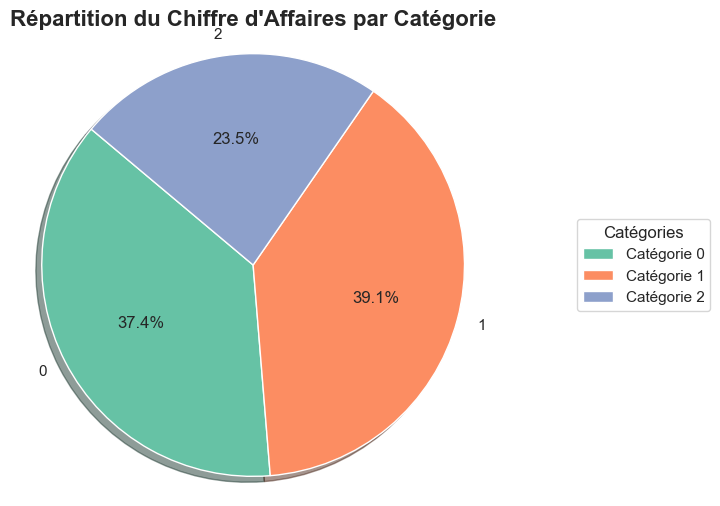

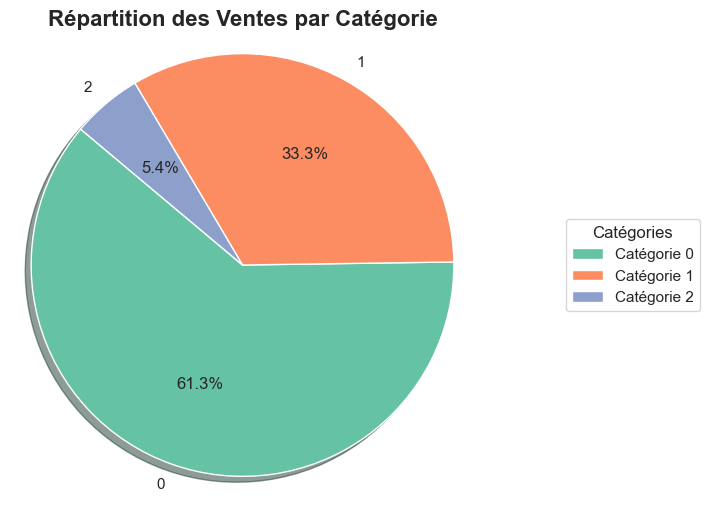

In [555]:
# Couleurs pour les graphiques
colors = sns.color_palette('Set2', n_colors=len(VISUALISATION_PAR_CATEGORIE_CA_GLOBAL))

# Graphique en secteurs pour le chiffre d'affaires par catégorie
plt.figure(figsize=(6, 6))
plt.pie(
    VISUALISATION_PAR_CATEGORIE_CA_GLOBAL['C.A'],
    labels=VISUALISATION_PAR_CATEGORIE_CA_GLOBAL['Catégorie'],
    autopct='%1.1f%%',
    shadow=True,
    colors=colors,
    startangle=140
)
plt.title('Répartition du Chiffre d\'Affaires par Catégorie', fontsize=16, fontweight='bold')
plt.axis('equal')  # Pour que le camembert soit un cercle parfait
legend = plt.legend(title="Catégories", labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"], loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

# Sauvegarder l'image avec la légende
plt.savefig('RépartitionduChiffredAffairesparCatégorie2.png', bbox_inches='tight', dpi=300)

plt.show()

# Graphique en secteurs pour les ventes par catégorie
plt.figure(figsize=(6, 6))
plt.pie(
    VISUALISATION_PAR_CATEGORIE_VENTES_GLOBAL['VENTES'],
    labels=VISUALISATION_PAR_CATEGORIE_VENTES_GLOBAL['Catégorie'],
    autopct='%1.1f%%',
    shadow=True,
    colors=colors,
    startangle=140
)
plt.title('Répartition des Ventes par Catégorie', fontsize=16, fontweight='bold')
plt.axis('equal')  # Pour que le camembert soit un cercle parfait
legend = plt.legend(title="Catégories", labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"], loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

# Sauvegarder l'image avec la légende
plt.savefig('RépartitiondesVentesparCatégorie2.png', bbox_inches='tight', dpi=300)

plt.show()

<div style="font-family:Garamond"> <div style="font-size: 20px">

La catégorie 1 se distingue par sa contribution prédominante au chiffre d'affaires, représentant 39 % du total, suivie de très près par la catégorie 0 avec 37 %. La catégorie 2 contribue quant à elle à 23 % du chiffre d'affaires global.

En examinant la répartition des ventes par catégorie, on constate que la catégorie 0 génère 61 % des ventes, ce qui en fait la catégorie la plus prolifique en termes de volume. 
Cette catégorie regroupe des références aux prix les plus bas, ce qui explique son poids important en ventes. 

En revanche, la catégorie 2, bien que n'ayant qu'une part de 5 % dans les ventes, représente 23 % du chiffre d'affaires. Cela suggère que cette catégorie regroupe des livres à prix plus élevés, contribuant ainsi de manière significative au chiffre d'affaires malgré son faible volume de ventes.

### <div style="font-family: 'Garamond', serif; font-size: 24px; color: #333333; text-align: center;">Zoom sur les références 

In [556]:
#Création des dataframes et conversion en html 

TOP_GLOBAL = Lapage
TOP_GLOBAL = TOP_GLOBAL.reset_index()
TOP_GLOBAL = TOP_GLOBAL.groupby('id_prod')['date'].count()
TOP_GLOBAL = TOP_GLOBAL.sort_values( ascending= False)
TOP_GLOBAL = TOP_GLOBAL.head(30).to_frame()
TOP_GLOBAL = TOP_GLOBAL.rename(columns={"date": 'Nombre de ventes'})
TOP_GLOBAL = TOP_GLOBAL.to_html()


FLOP_GLOBAL = Lapage
FLOP_GLOBAL = FLOP_GLOBAL.reset_index()
FLOP_GLOBAL = FLOP_GLOBAL.groupby('id_prod')['date'].count()
FLOP_GLOBAL = FLOP_GLOBAL.sort_values(ascending=True)
FLOP_GLOBAL = FLOP_GLOBAL.head(30).to_frame()
FLOP_GLOBAL = FLOP_GLOBAL.rename(columns={"date": 'Nombre de ventes'})
FLOP_GLOBAL = FLOP_GLOBAL.to_html()

TOP_PAR_CATEG = Lapage
TOP_PAR_CATEG = TOP_PAR_CATEG.reset_index()
TOP_PAR_CATEG = TOP_PAR_CATEG.groupby('categ')['date'].count()
TOP_PAR_CATEG = TOP_PAR_CATEG.to_frame()
TOP_PAR_CATEG = TOP_PAR_CATEG.rename(columns={"date": 'Nombre de ventes'})
TOP_PAR_CATEG = TOP_PAR_CATEG.to_html()


TOP_CATEG_0 = Lapage.loc[Lapage['categ'] == 0, :]
TOP_CATEG_0 = TOP_CATEG_0.reset_index()
TOP_CATEG_0 = TOP_CATEG_0.groupby('id_prod')['date'].count()
TOP_CATEG_0 = TOP_CATEG_0.sort_values( ascending= False)
TOP_CATEG_0 = TOP_CATEG_0.head(30).to_frame()
TOP_CATEG_0 = TOP_CATEG_0.rename(columns={"date": 'Nombre de ventes'})
TOP_CATEG_0 = TOP_CATEG_0.to_html()

FLOP_CATEG_0 = Lapage.loc[Lapage['categ'] == 0, :]
FLOP_CATEG_0 = FLOP_CATEG_0.reset_index()
FLOP_CATEG_0 = FLOP_CATEG_0.groupby('id_prod')['date'].count()
FLOP_CATEG_0 = FLOP_CATEG_0.sort_values( ascending= True)
FLOP_CATEG_0 = FLOP_CATEG_0.head(30).to_frame()
FLOP_CATEG_0 = FLOP_CATEG_0.rename(columns={"date": 'Nombre de ventes'})
FLOP_CATEG_0 =  FLOP_CATEG_0.to_html()

TOP_CATEG_1 = Lapage.loc[Lapage['categ'] == 1, :]
TOP_CATEG_1 = TOP_CATEG_1.reset_index()
TOP_CATEG_1 = TOP_CATEG_1.groupby('id_prod')['date'].count()
TOP_CATEG_1 = TOP_CATEG_1.sort_values( ascending= False)
TOP_CATEG_1 = TOP_CATEG_1.head(30).to_frame()
TOP_CATEG_1 = TOP_CATEG_1.rename(columns={"date": 'Nombre de ventes'})
TOP_CATEG_1 = TOP_CATEG_1.to_html()

FLOP_CATEG_1 = Lapage.loc[Lapage['categ'] == 1, :]
FLOP_CATEG_1 = FLOP_CATEG_1.reset_index()
FLOP_CATEG_1 = FLOP_CATEG_1.groupby('id_prod')['date'].count()
FLOP_CATEG_1 = FLOP_CATEG_1.sort_values( ascending= True)
FLOP_CATEG_1 = FLOP_CATEG_1.head(30).to_frame()
FLOP_CATEG_1 = FLOP_CATEG_1.rename(columns={"date": 'Nombre de ventes'})
FLOP_CATEG_1 = FLOP_CATEG_1.to_html()

TOP_CATEG_2 = Lapage.loc[Lapage['categ'] == 2, :]
TOP_CATEG_2 = TOP_CATEG_2.reset_index()
TOP_CATEG_2 = TOP_CATEG_2.groupby('id_prod')['date'].count()
TOP_CATEG_2 = TOP_CATEG_2.sort_values( ascending= False)
TOP_CATEG_2 = TOP_CATEG_2.head(30).to_frame()
TOP_CATEG_2 = TOP_CATEG_2.rename(columns={"date": 'Nombre de ventes'})
TOP_CATEG_2 = TOP_CATEG_2.to_html()

FLOP_CATEG_2 = Lapage.loc[Lapage['categ'] == 2, :]
FLOP_CATEG_2 = FLOP_CATEG_2.reset_index()
FLOP_CATEG_2 = FLOP_CATEG_2.groupby('id_prod')['date'].count()
FLOP_CATEG_2 = FLOP_CATEG_2.sort_values( ascending= True)
FLOP_CATEG_2 = FLOP_CATEG_2.head(30).to_frame()
FLOP_CATEG_2 = FLOP_CATEG_2.rename(columns={"date": 'Nombre de ventes'})
FLOP_CATEG_2 = FLOP_CATEG_2.to_html()

In [557]:
# Afficher les DataFrames avec 3 par ligne
display(HTML(f"""
<table style="width:100%; border-spacing: 20px;">
  <tr>
    <td style="width:50%; text-align:center;">
      <h3 style="text-align:left;">Top global</h3>
      {TOP_GLOBAL}
    </td>
    <td style="width:50%; text-align:center;">
      <h3 style="text-align:left;">Flop global</h3>
      {FLOP_GLOBAL}
    </td>
    <td style="width:50%; text-align:center;">
      <h3 style="text-align:left;">Top par catégorie</h3>
      {TOP_PAR_CATEG}
    </td>
  </tr>
  <tr>
    <td style="width:50%; text-align:center;">
      <h2 style="text-align:left;">Top catégorie 0</h3>
      {TOP_CATEG_0}
    </td>
    <td style="width:50%; text-align:center;">
      <h2 style="text-align:left;">Top catégorie 1</h3>
      {TOP_CATEG_1}
    </td>
    <td style="width:50%; text-align:center;">
      <h2 style="text-align:left;">Top catégorie 2</h3>
      {TOP_CATEG_2}
    </td>
  </tr>
  <tr>
    <td style="width:50%; text-align:center;">
      <h2 style="text-align:left;">Flop catégorie 0</h3>
      {FLOP_CATEG_0}
    </td>
    <td style="width:50%; text-align:center;">
      <h2 style="text-align:left;">Flop catégorie 1</h3>
      {FLOP_CATEG_1}
    </td>
    <td style="width:50%; text-align:center;">
       <h2 style="text-align:left;">Flop catégorie 2</h3>
      {FLOP_CATEG_2}
    </td>
  </tr>
</table>
"""))

,Nombre de ventes
id_prod,
1_369,2237
1_417,2173
1_414,2166
1_498,2117
1_425,2084
1_403,1950
1_412,1938
1_413,1931
1_406,1931


 <div style="font-family:Garamond"> <div style="font-size: 20px">
    
Le livres le plus vendus de la librairie Lapage est un produit de la catégorie 1 (ref:'1_369'). Il s'est écoulé a 2252 exemplaires et aussi on retrouve dans le top 30 des livres les plus vendus que des produits de la catégorie 1.

J'ai aussi remarqué que dans le flop 30 des livres les moins vendus, on y retrouve majoritairement des produits de la catégorie 0 et de plus on a 21 produits qui n'ont jamais été vendus. Les produits non vendus sont en faites les 21 fameux produits qui n'ont jamais été vendus.


Enfin, d'après notre classement des catégories les plus vendus la cat 0 arrive en tête suivi de la cat 1 et 2.


### <div style="font-family: 'Garamond', serif; font-size: 24px; color: #333333; text-align: center;">Analyse des profils de nos clients 

In [558]:
Lapage

,date,id_prod,price,categ,session_id,client_id,année,mois,jour
0,2022-02-20 17:04:37.204937,0_1421,19.99,0.0,s_168213,c_6389,2022.0,2.0,20.0
1,2022-11-19 03:42:20.707442,0_1421,19.99,0.0,s_299590,c_8364,2022.0,11.0,19.0
2,2021-09-19 14:58:46.726179,0_1421,19.99,0.0,s_92304,c_3544,2021.0,9.0,19.0
3,2023-01-11 16:04:24.367855,0_1421,19.99,0.0,s_325369,c_1025,2023.0,1.0,11.0
4,2021-08-01 19:33:18.877168,0_1421,19.99,0.0,s_70071,c_2298,2021.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...
679348,2021-08-25 09:06:03.504061,0_2245,10.63,0.0,s_80395,c_131,2021.0,8.0,25.0
679349,2022-03-06 19:59:19.462288,0_2245,10.63,0.0,s_175311,c_4167,2022.0,3.0,6.0
679350,2022-05-16 11:35:20.319501,0_2245,10.63,0.0,s_209381,c_4453,2022.0,5.0,16.0
679351,2022-02-11 09:05:43.952857,0_2245,10.63,0.0,s_163405,c_1098,2022.0,2.0,11.0


In [559]:
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [560]:
#Jointure du fichier Lapage et customers
Lapage_clients = pd.merge(Lapage, customers, on='client_id', how ='left')

In [561]:
Lapage_clients

,date,id_prod,price,categ,session_id,client_id,année,mois,jour,sex,birth
0,2022-02-20 17:04:37.204937,0_1421,19.99,0.0,s_168213,c_6389,2022.0,2.0,20.0,f,1991.0
1,2022-11-19 03:42:20.707442,0_1421,19.99,0.0,s_299590,c_8364,2022.0,11.0,19.0,m,1973.0
2,2021-09-19 14:58:46.726179,0_1421,19.99,0.0,s_92304,c_3544,2021.0,9.0,19.0,f,1967.0
3,2023-01-11 16:04:24.367855,0_1421,19.99,0.0,s_325369,c_1025,2023.0,1.0,11.0,m,1984.0
4,2021-08-01 19:33:18.877168,0_1421,19.99,0.0,s_70071,c_2298,2021.0,8.0,1.0,m,1972.0
...,...,...,...,...,...,...,...,...,...,...,...
677682,2021-08-25 09:06:03.504061,0_2245,10.63,0.0,s_80395,c_131,2021.0,8.0,25.0,m,1981.0
677683,2022-03-06 19:59:19.462288,0_2245,10.63,0.0,s_175311,c_4167,2022.0,3.0,6.0,f,1979.0
677684,2022-05-16 11:35:20.319501,0_2245,10.63,0.0,s_209381,c_4453,2022.0,5.0,16.0,m,1981.0
677685,2022-02-11 09:05:43.952857,0_2245,10.63,0.0,s_163405,c_1098,2022.0,2.0,11.0,m,1986.0


In [562]:
#Repartition des clients par tranches d'age

#Rajout d'une colonne d'age
today = date.today()
Lapage_clients['age'] = today.year - Lapage_clients['birth']

# Créer des tranches d'age
Lapage_clients.loc[Lapage_clients['age']<=28, "Tranche d'age"] = '18-28'
Lapage_clients.loc[Lapage_clients['age'].between(29,38), "Tranche d'age"] = '29-38'
Lapage_clients.loc[Lapage_clients['age'].between(39,48), "Tranche d'age"] = '39-48'
Lapage_clients.loc[Lapage_clients['age'].between(49,60), "Tranche d'age"] = '49-60'
Lapage_clients.loc[Lapage_clients['age']>=61, "Tranche d'age"] = '61 et +'

#Nombre de client par tranche d'age
NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE = Lapage_clients[["client_id","Tranche d'age"]]
NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE = NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE.drop_duplicates(subset='client_id', keep='first')
NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE = NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE.groupby("Tranche d'age").count()
NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE = NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE.rename(columns={"client_id": 'Nombre de clients'})

#Calcul du sex par tranche d'age
SEX_PAR_TRANCHE_DAGE = Lapage_clients[['sex',"Tranche d'age",'client_id']]
SEX_PAR_TRANCHE_DAGE = SEX_PAR_TRANCHE_DAGE.drop_duplicates(subset='client_id', keep='first')
SEX_PAR_TRANCHE_DAGE = SEX_PAR_TRANCHE_DAGE.groupby(["Tranche d'age",'sex'])['client_id'].count()
SEX_PAR_TRANCHE_DAGE = SEX_PAR_TRANCHE_DAGE.to_frame()
SEX_PAR_TRANCHE_DAGE = SEX_PAR_TRANCHE_DAGE.rename(columns={"client_id": 'Effectif'})

#Calcul des ventes par tranches d'age
VENTE_PAR_TRANCHE_DAGE = Lapage_clients[["date","Tranche d'age"]]
VENTE_PAR_TRANCHE_DAGE = VENTE_PAR_TRANCHE_DAGE.groupby("Tranche d'age").count()
VENTE_PAR_TRANCHE_DAGE = VENTE_PAR_TRANCHE_DAGE.rename(columns={"date": 'Ventes'})


#Calcul du CA par tranche d'age
CA_PAR_TRANCHE_DAGE = Lapage_clients[["Tranche d'age","price"]]
CA_PAR_TRANCHE_DAGE = CA_PAR_TRANCHE_DAGE.groupby("Tranche d'age").sum()
CA_PAR_TRANCHE_DAGE = CA_PAR_TRANCHE_DAGE.rename(columns={"price": 'C.A'})

#Repartition des clients par sex, nombre de personne et %age
SEX_REPARTITION_GLOBAL = SEX_PAR_TRANCHE_DAGE.groupby('sex')['Effectif'].sum()
SEX_REPARTITION_GLOBAL = SEX_REPARTITION_GLOBAL.to_frame()

#CA par sex
CA_PAR_SEX = Lapage_clients[["sex","price"]]
CA_PAR_SEX = CA_PAR_SEX.groupby('sex').sum()

#CA par sex par catégorie
CA_PAR_SEX_PAR_CATEGORIE = Lapage_clients[["sex","categ","price"]]
CA_PAR_SEX_PAR_CATEGORIE = CA_PAR_SEX_PAR_CATEGORIE.groupby(["categ",'sex'])['price'].sum()
CA_PAR_SEX_PAR_CATEGORIE = CA_PAR_SEX_PAR_CATEGORIE.to_frame()

#Vente par sex par catégorie
VENTE_PAR_SEX_PAR_CATEGORIE = Lapage_clients[["sex","categ","price"]]
VENTE_PAR_SEX_PAR_CATEGORIE = VENTE_PAR_SEX_PAR_CATEGORIE.groupby(["categ",'sex'])['price'].count()
VENTE_PAR_SEX_PAR_CATEGORIE = VENTE_PAR_SEX_PAR_CATEGORIE.to_frame()

# Jointure des dataframe
VENTE_CA_TRANCHE_DAGE = pd.merge(VENTE_PAR_TRANCHE_DAGE, CA_PAR_TRANCHE_DAGE, on="Tranche d'age", how ='outer')
VENTE_CA_TRANCHE_DAGE = pd.merge(VENTE_CA_TRANCHE_DAGE, NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE, on="Tranche d'age", how ='outer')


In [563]:
# Creation d'une fonction affin d'afficher les tables les une à côté des autres
def display_dfs(dfs, gap=50, justify='center'):
    html = ""
    for title, df in dfs.items():  
        df_html = df._repr_html_()
        cur_html = f'<div> <h3>{title}</h3> {df_html}</div>'
        html +=  cur_html
    html= f"""
    <div style="display:flex; gap:{gap}px; justify-content:{justify};">
        {html}
    </div>
    """
    display_html(html, raw=True)

In [564]:
# Affichage des tables
dfs10 = {'Effectifs des genres' : SEX_REPARTITION_GLOBAL, 'Effectifs des genres par age': SEX_PAR_TRANCHE_DAGE,'Ventes, C.A et effectifs par age': VENTE_CA_TRANCHE_DAGE}
dfs11 = {'C.A par genre': CA_PAR_SEX, 'C.A par catégorie et genre': CA_PAR_SEX_PAR_CATEGORIE, 'Vente par genre et catégories': VENTE_PAR_SEX_PAR_CATEGORIE }
display_dfs(dfs10, justify='flex-start')
display_dfs(dfs11, justify='flex-start')

Effectifs des genres 

 
 
 
 
 Effectif 
 
 
 sex 
 
 
 
 
 
 f 
 4479 
 
 
 m 
 4121 
 
 
 
 Effectifs des genres par age 

 
 
 
 
 
 Effectif 
 
 
 Tranche d'age 
 sex 
 
 
 
 
 
 18-28 
 f 
 828 
 
 
 m 
 786 
 
 
 29-38 
 f 
 870 
 
 
 m 
 810 
 
 
 39-48 
 f 
 888 
 
 
 m 
 842 
 
 
 49-60 
 f 
 953 
 
 
 m 
 857 
 
 
 61 et + 
 f 
 940 
 
 
 m 
 826 
 
 
 
 Ventes, C.A et effectifs par age 

 
 
 
 
 Ventes 
 C.A 
 Nombre de clients 
 
 
 Tranche d'age 
 
 
 
 
 
 
 
 18-28 
 58479 
 2447104.18 
 1614 
 
 
 29-38 
 140112 
 2415132.53 
 1680 
 
 
 39-48 
 229333 
 3021712.57 
 1730 
 
 
 49-60 
 153862 
 2332222.96 
 1810 
 
 
 61 et + 
 95880 
 1606143.35 
 1766

C.A par genre 

 
 
 
 
 price 
 
 
 sex 
 
 
 
 
 
 f 
 5844491.31 
 
 
 m 
 5977824.28 
 
 
 
 C.A par catégorie et genre 

 
 
 
 
 
 price 
 
 
 categ 
 sex 
 
 
 
 
 
 0.0 
 f 
 2191256.78 
 
 
 m 
 2230823.42 
 
 
 1.0 
 f 
 2341981.49 
 
 
 m 
 2277978.88 
 
 
 2.0 
 f 
 1311253.04 
 
 
 m 
 1469021.98 
 
 
 
 Vente par genre et catégories 

 
 
 
 
 
 price 
 
 
 categ 
 sex 
 
 
 
 
 
 0.0 
 f 
 206220 
 
 
 m 
 209460 
 
 
 1.0 
 f 
 114087 
 
 
 m 
 111416 
 
 
 2.0 
 f 
 17283 
 
 
 m 
 19200

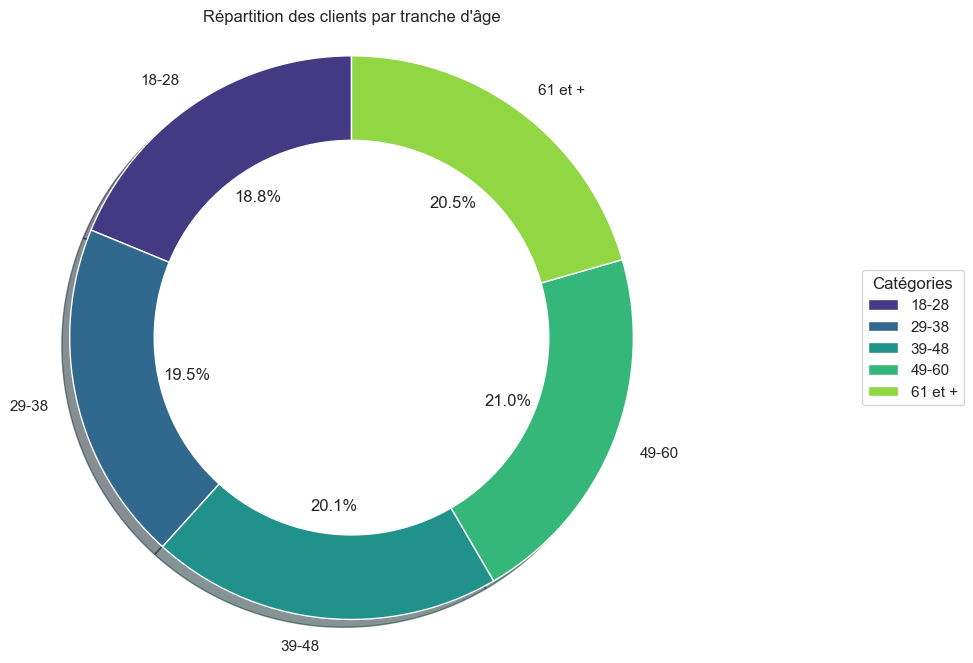

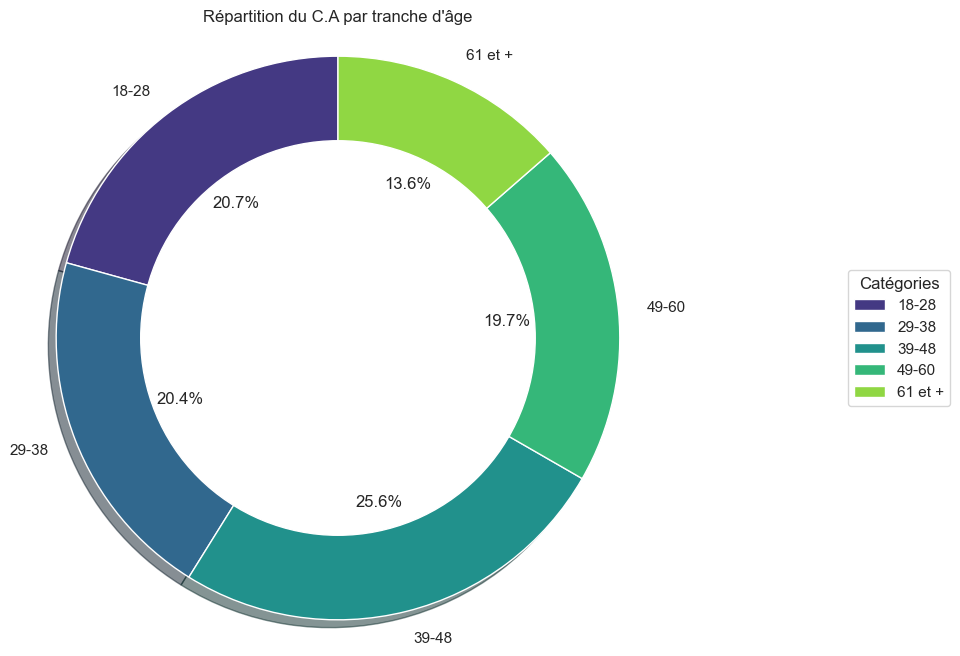

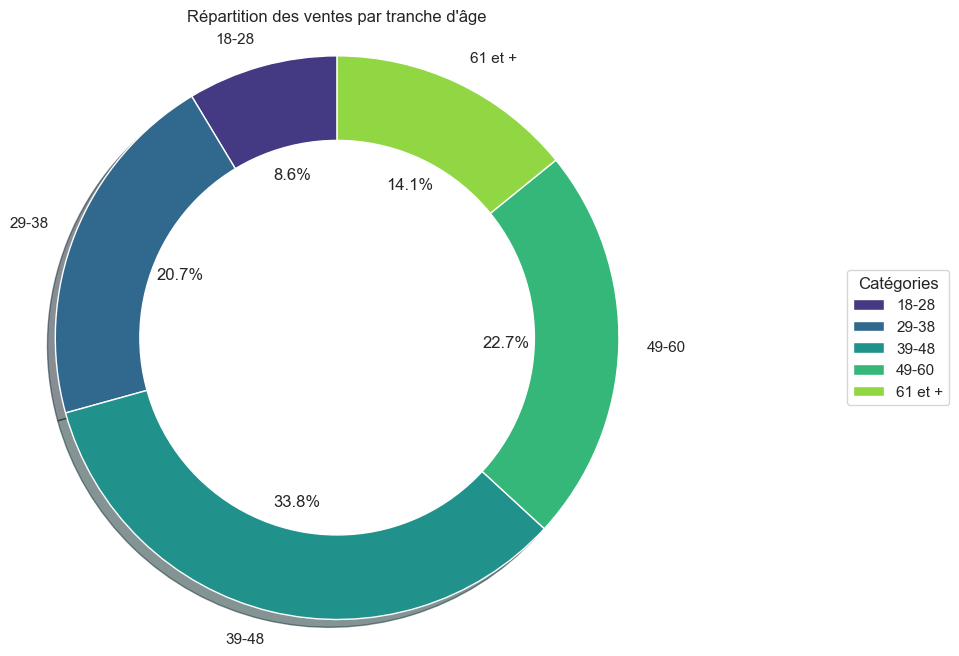

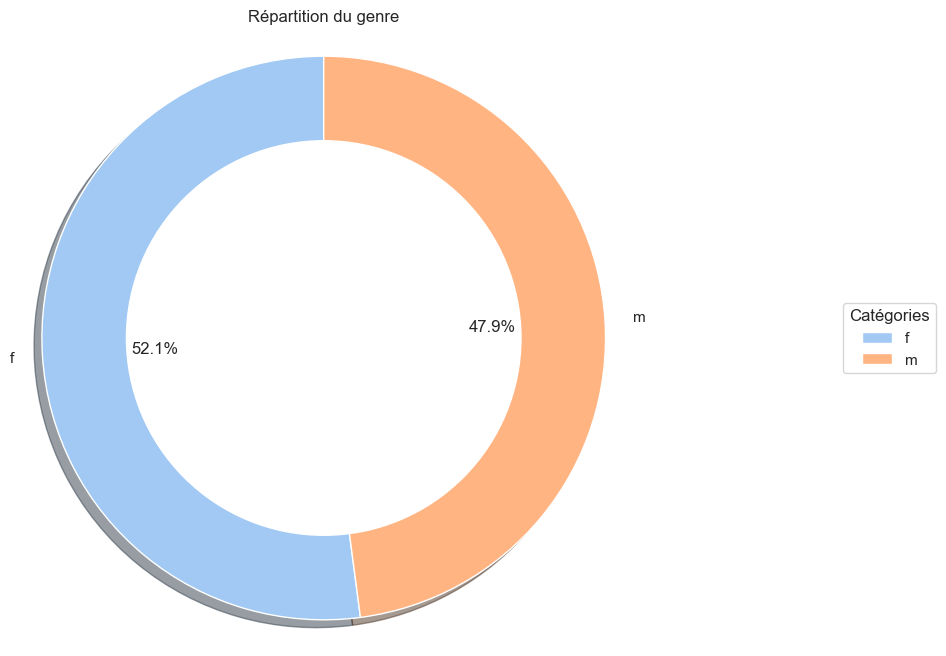

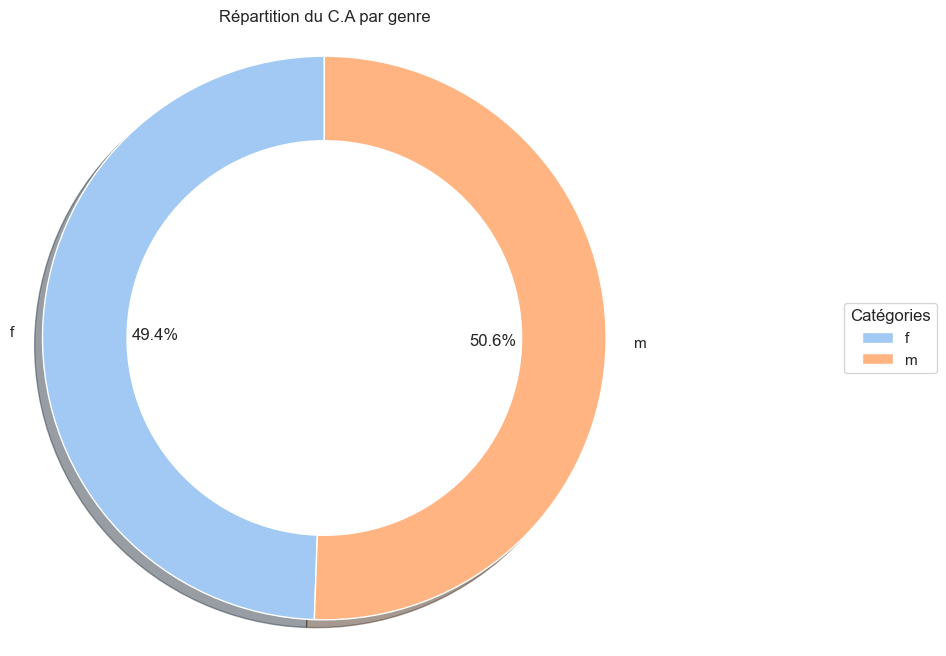

In [565]:
def donut_chart(sizes, labels, title, colors=None, filename=None):
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
    
    # Création de l'effet donut
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Titre
    plt.title(title)
    plt.axis('equal')  # Pour s'assurer que le graphique est bien circulaire
    
    # Ajout de la légende
    plt.legend(wedges, labels, title="Catégories", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
    
    # Sauvegarder l'image si un nom de fichier est donné
    if filename:
        plt.savefig(filename, bbox_inches='tight', dpi=300)
    
    plt.show()

# Couleurs pour les charts
palette_age = sns.color_palette("viridis", len(NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE))
palette_sex = sns.color_palette("pastel", len(SEX_REPARTITION_GLOBAL))

# Graphique 1 : Répartition des clients par tranche d'âge (Donut Chart)
donut_chart(sizes=NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE['Nombre de clients'], 
            labels=NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE.index, 
            title="Répartition des clients par tranche d'âge", 
            colors=palette_age, 
            filename='Repartition_clients_age.png')

# Graphique 2 : Répartition du C.A par tranche d'âge (Donut Chart)
donut_chart(sizes=CA_PAR_TRANCHE_DAGE['C.A'], 
            labels=CA_PAR_TRANCHE_DAGE.index, 
            title="Répartition du C.A par tranche d'âge", 
            colors=palette_age, 
            filename='Repartition_CA_age.png')

# Graphique 3 : Répartition des ventes par tranche d'âge (Donut Chart)
donut_chart(sizes=VENTE_PAR_TRANCHE_DAGE['Ventes'], 
            labels=VENTE_PAR_TRANCHE_DAGE.index, 
            title="Répartition des ventes par tranche d'âge", 
            colors=palette_age, 
            filename='Repartition_ventes_age.png')

# Graphique 4 : Répartition du genre (Donut Chart)
donut_chart(sizes=SEX_REPARTITION_GLOBAL['Effectif'], 
            labels=SEX_REPARTITION_GLOBAL.index, 
            title="Répartition du genre", 
            colors=palette_sex, 
            filename='Repartition_genre.png')

# Graphique 5 : Répartition du C.A par genre (Donut Chart)
donut_chart(sizes=CA_PAR_SEX['price'], 
            labels=CA_PAR_SEX.index, 
            title="Répartition du C.A par genre", 
            colors=palette_sex, 
            filename='Repartition_CA_genre.png')


 <div style="font-family:Garamond"> <div style="font-size: 20px">
    
Nous avons une bonne parité au niveau de la répartition des genres. Ces deux groupes génèrent un chiffre d'affaires et des ventes quasi similaires dans chaque catégorie.

L'âge des clients est également bien réparti, avec environ 20 % dans chaque tranche d'âge. La tranche des 39-48 ans contribue le plus au chiffre d'affaires représentant 26 %, suivi de près par les 18-28 ans (24 %) et les 29-38 ans (21 %). 
Les clients de 49 à 60 ans représentent 17 %, tandis que ceux de 61 ans et plus en génèrent 12 %.

### <div style="font-family: 'Garamond', serif; font-size: 24px; color: #333333; text-align: center;">Repartition du Chiffre d'affaire par client

<div style="font-family:Garamond"> <div style="font-size: 20px">
Pour l'étude de la répartition du chiffre d'affaire au sein de notre clientèle, je décide de retirer nos 4 clients btob afin de ne pas impacter et de ne pas fausser notre courbe de lorenz.


In [566]:
# Retirer les clients B2B de Lapage pour les analyses futures

Lapage_clients = Lapage_clients[~Lapage_clients['client_id'].isin(clients_btob)]

,C.A
client_id,
c_3263,5276.87
c_1570,5237.03
c_2899,5214.05
c_2140,5172.84
c_7319,5155.77
c_8026,5093.21
c_7421,5050.20
c_7959,5048.26
c_1422,4993.55


Indice de Gini : 0.40


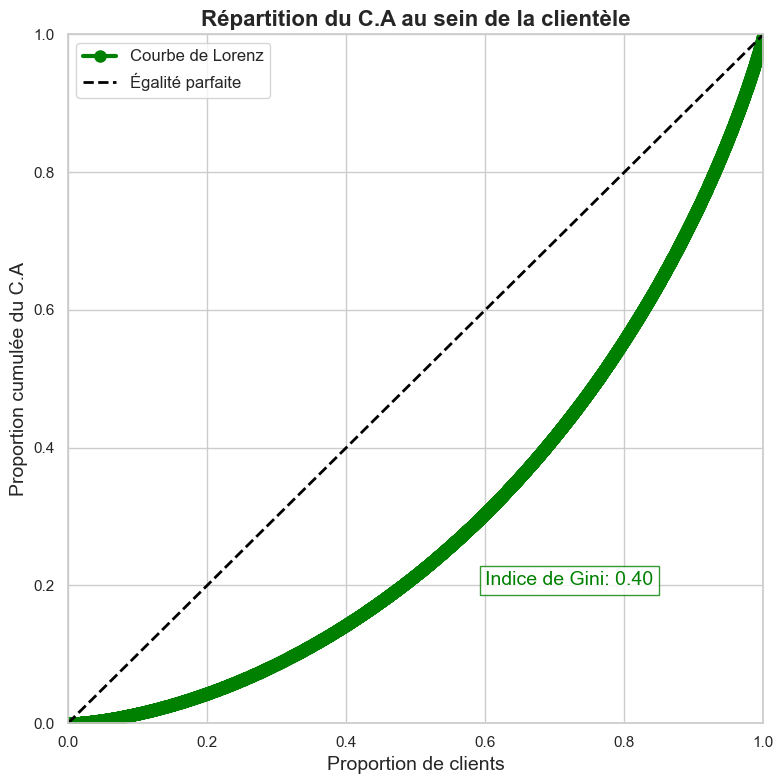

In [567]:
# Repartition du CA par client
REPARTITION_CA_PAR_CLIENT = Lapage_clients[['price','client_id']]
REPARTITION_CA_PAR_CLIENT = REPARTITION_CA_PAR_CLIENT.groupby('client_id').sum()
REPARTITION_CA_PAR_CLIENT = REPARTITION_CA_PAR_CLIENT.sort_values('price', ascending=False)
REPARTITION_CA_PAR_CLIENT = REPARTITION_CA_PAR_CLIENT.rename(columns={"price": 'C.A'})

display(REPARTITION_CA_PAR_CLIENT.head(20))

# Fonction lorenz améliorée avec Matplotlib
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)
    
    # Fonction Indice de Gini
    def gini(array):
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_ * weighted_sum / sorted_array.sum() - const_
    
    gini_value = gini(X)
    print(f"Indice de Gini : {gini_value:.2f}")
    
    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    y = np.arange(X_lorenz.size) / (X_lorenz.size - 1)
    
    # Graphique avec Matplotlib
    plt.figure(figsize=(8, 8))
    
    # Courbe de Lorenz en vert
    plt.plot(y, X_lorenz, marker='o', color='green', label='Courbe de Lorenz', linewidth=3, markersize=8)
    
    # Diagonale d'égalité parfaite en noir
    plt.plot([0, 1], [0, 1], color='black', label='Égalité parfaite', linestyle='--', linewidth=2)
    
    # Annotations pour l'indice de Gini
    plt.text(0.6, 0.2, f'Indice de Gini: {gini_value:.2f}', fontsize=14, color='green', bbox=dict(facecolor='white', edgecolor='green', alpha=0.8))
    
    # Ajustement du graphique
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('Proportion de clients', fontsize=14)
    plt.ylabel('Proportion cumulée du C.A', fontsize=14)
    plt.title(title, fontsize=16, weight='bold')
    plt.legend(loc='upper left', fontsize=12)
    
    # Sauvegarde du graphique
    plt.savefig('RépartitionduCAavecMatplotlib.png', dpi=300, bbox_inches='tight')
    
    # Affichage du graphique
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Appel de la fonction lorenz
lorenz(REPARTITION_CA_PAR_CLIENT['C.A'], 'Répartition du C.A au sein de la clientèle')


 <div style="font-family:Garamond"> <div style="font-size: 20px">

L'analyse de la répartition du chiffre d'affaires à travers la courbe de Lorenz et l'indice de Gini qui est de 0.40, révèle une certaine inégalité : environ 70 % des clients ne contribuent qu'à 40 % du chiffre d'affaires total.

## ETAPE 4:  Analyse des comportements clients

### 4.1)  Genre d'un client et categorie de livre acheté

<div style="font-family:Garamond"> <div style="font-size: 20px">

Question : Existe t'il un lien entre le genre d'un client et le catégorie de livre acheté ?

Hypothèse H0 : Il n'y a pas de relation entre ces deux variables.
<br>Hypothèse H1 : Il existe une relation entre l'age et le montant total des achats. 

Population = Ensembles des transactions de la table transaction. 
<br>Individus = Transactions. 
<br>Variables Sex du client ("sex") = Variable qualitative nominale. 
<br>Variable catégorie du livre acheté ("categ") = Variables qualitative ordinale.

La variable categorie contiens plus de deux groupe (categorie 0,1 et 2) on va donc partir sur un test de KHI-2.    
</div>

In [568]:
GENRE_ET_CATEGORIES = Lapage_clients[['date','price','categ','sex']]
GENRE_ET_CATEGORIES = GENRE_ET_CATEGORIES.groupby(["sex",'categ'])['date'].count()
GENRE_ET_CATEGORIES = GENRE_ET_CATEGORIES.to_frame()
GENRE_ET_CATEGORIES = GENRE_ET_CATEGORIES.rename(columns={"date": 'ventes'})
GENRE_ET_CATEGORIES = GENRE_ET_CATEGORIES.reset_index()

FEMMES_ET_CATEGORIES = GENRE_ET_CATEGORIES.loc[GENRE_ET_CATEGORIES['sex'] == 'f']
HOMMES_ET_CATEGORIES = GENRE_ET_CATEGORIES.loc[GENRE_ET_CATEGORIES['sex'] == 'm']

In [569]:
GENRE_ET_CATEGORIES

,sex,categ,ventes
0,f,0.0,200904
1,f,1.0,110550
2,f,2.0,16980
3,m,0.0,186589
4,m,1.0,100227
5,m,2.0,15868


In [570]:
FEMMES_ET_CATEGORIES 

,sex,categ,ventes
0,f,0.0,200904
1,f,1.0,110550
2,f,2.0,16980


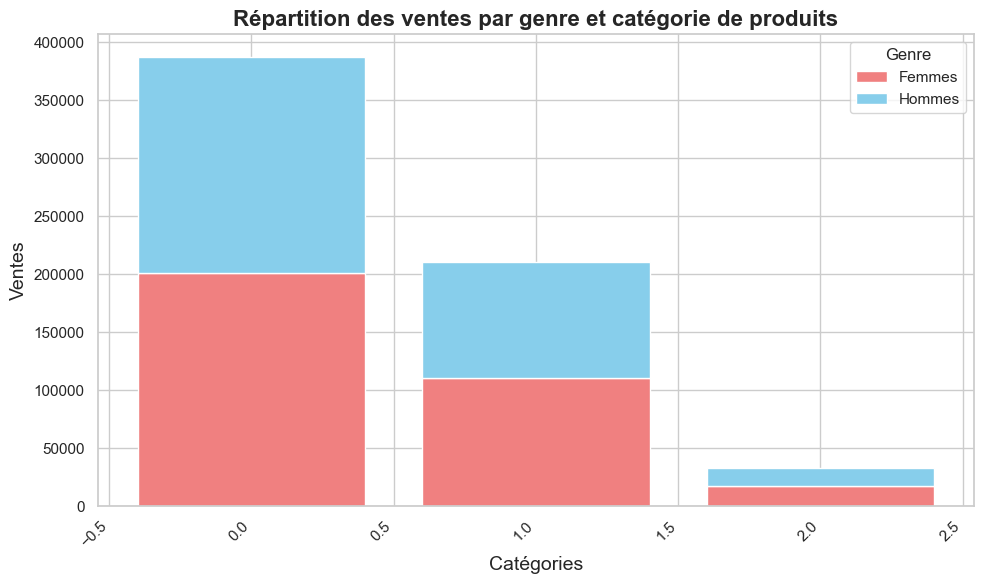

ventes               
categ     0.0     1.0    2.0
sex                         
f      200904  110550  16980
m      186589  100227  15868

Le resultat du test de khi-deux est de 21.47634620378189

Le degrès de libérté est de  2

Les effectifs attendus sont [[201651.47557509 109688.41519019  17094.10923472]
 [185841.52442491 101088.58480981  15753.89076528]]

La p-valeur est de 2.1700546749821838e-05


In [571]:
# Fonction pour créer un histogramme empilé
def stacked_bar_chart(df_femmes, df_hommes, title, categories_column, sales_column):
    # Définir la taille du graphique
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")  # Style épuré
    
    # Plot pour les femmes
    plt.bar(df_femmes[categories_column], df_femmes[sales_column], label='Femmes', color='lightcoral')
    
    # Plot pour les hommes (empilé sur les femmes)
    plt.bar(df_hommes[categories_column], df_hommes[sales_column], bottom=df_femmes[sales_column], label='Hommes', color='skyblue')
    
    # Ajouter les titres et légendes
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Catégories', fontsize=14)
    plt.ylabel('Ventes', fontsize=14)
    
    # Légende
    plt.legend(title='Genre')
    
    # Rotation des labels des catégories si nécessaire
    plt.xticks(rotation=45, ha='right')
    
    # Afficher le graphique
    plt.tight_layout()
    # Sauvegarder l'image
    plt.savefig('Répartitiondesventespargenreetcatégoriedeproduits.png', dpi=300)
    
    plt.show()

# Créer le graphique empilé
stacked_bar_chart(FEMMES_ET_CATEGORIES, HOMMES_ET_CATEGORIES, 'Répartition des ventes par genre et catégorie de produits', 'categ', 'ventes')

# Création d'un tableau de contingence
GENRE_ET_CATEGORIES_CONTINGENCE = GENRE_ET_CATEGORIES.pivot_table(index='sex', columns='categ')
display(GENRE_ET_CATEGORIES_CONTINGENCE)

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(GENRE_ET_CATEGORIES_CONTINGENCE)
print('Le resultat du test de khi-deux est de', st_chi2 )
print()
print('Le degrès de libérté est de ',st_dof)
print()
print('Les effectifs attendus sont', st_exp.round(10))
print()
print('La p-valeur est de',st_p)

<div style="font-family:Garamond"> <div style="font-size: 20px">

D'après le test du khi-deux, l'hypothèse H 0 est rejetée, car le résultat obtenu (147) est supérieur au seuil critique de 5,99 pour un degré de liberté de 2. De plus, la p-valeur, inférieure à 0,05, indique une faible probabilité de commettre une erreur de type I (rejeter H 0 à tort). Cela suggère que la variable "genre" est effectivement corrélée à la variable "catégorie de livre".

Cependant, en analysant la répartition des catégories de livres achetées par chaque genre, les différences semblent minimes. Pour mieux comprendre la force de cette corrélation, il serait pertinent d'effectuer un test du V de Cramer. Le V de Cramer, dont la formule est √((Khi2/(echantillon*degrèsdeliberté)),mesure l'intensité de la relation entre les variables. Plus le V de Cramer est proche de 1, plus la corrélation est forte. 

In [572]:
# Execution du test V de Cramer
print('V de Cramer = ',np.sqrt((147/679332*2)))

V de Cramer =  0.02080331901399866


<div style="font-family:Garamond"> <div style="font-size: 20px">

L'intensité de la corrélation est très faible, même si le test de Khi'2 affirme une relation, on sait maintenant qu'elle est non significative.

### 4.2) Age et montant total des achats

<div style="font-family:Garamond"> <div style="font-size: 20px">

Question :Existe t'il un lien entre l'age d'un client et le montant total de ses achats dans la librairie ?

Hypothèse H0 : Il n'y a pas de relation entre ces deux variables.
<br>Hypothèse H1 : Il existe une relation entre l'age et le montant total des achats. 

Population = Ensembles des clients ayant fait des achats. 
<br>Individus = clients. 
    
2 Variables à analyser :
<br>Variables Age = Variable quantitative discrète. 
<br>Variable Montant total des achats = Variables quantitative continue.

On cherche donc à chercher un lien entre deux variables quantitatives ( deux montants) ce sera donc un test d'association.

Les deux variables informent sur le même echantillon, ce sont donc des echantillons appariés.
</div>


,W,pval,normal
age,0.954924,0.008754,False


,W,pval,normal
montant total des ventes,0.911453,0.000059,False


,n,r,CI95%,p-val,power
spearman,76,-0.873684,"[-0.92, -0.81]",7.352708e-25,1.0


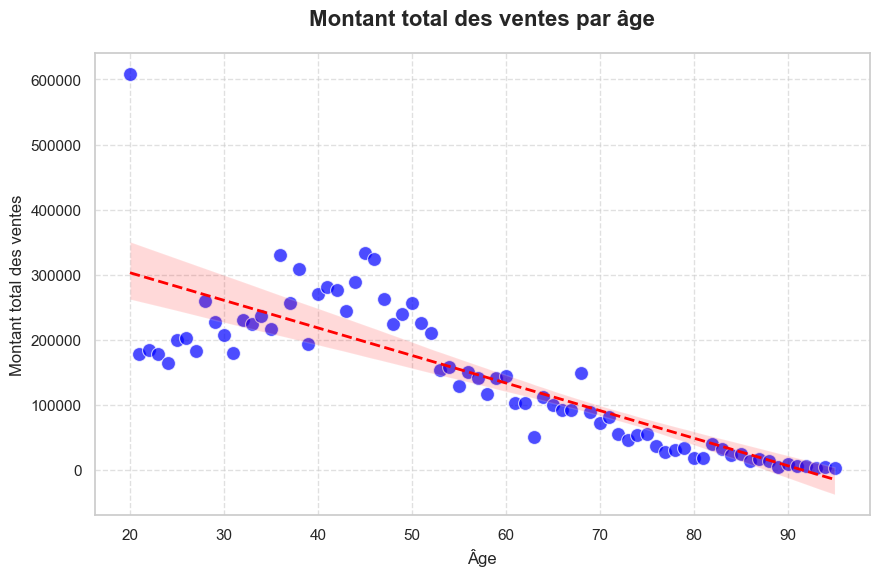

In [573]:
# Test normalité variables age et montant des achats
AGE_MONTANT_TOTAL = Lapage_clients[['client_id','price','age']]
AGE_MONTANT_TOTAL = AGE_MONTANT_TOTAL.groupby('client_id').agg({'price':'sum', 'age': 'mean'})
AGE_MONTANT_TOTAL = AGE_MONTANT_TOTAL.rename(columns={"price": 'montant total des ventes'})
AGE_MONTANT_TOTAL = AGE_MONTANT_TOTAL.groupby('age')['montant total des ventes'].sum().to_frame().reset_index()

# Test de shapiro wilk
display(pg.normality(AGE_MONTANT_TOTAL["age"]))
display(pg.normality(AGE_MONTANT_TOTAL['montant total des ventes']))

# Test de spearman
display(pg.corr(AGE_MONTANT_TOTAL["age"],AGE_MONTANT_TOTAL['montant total des ventes'], alternative='two-sided', method='spearman'))

# Création du graphique de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x=AGE_MONTANT_TOTAL['age'], 
                y=AGE_MONTANT_TOTAL['montant total des ventes'],
                color='blue', 
                edgecolor='w', 
                s=100, 
                alpha=0.7)

# Ajout d'une ligne de tendance
sns.regplot(x=AGE_MONTANT_TOTAL['age'], 
            y=AGE_MONTANT_TOTAL['montant total des ventes'], 
            scatter=False, 
            color='red', 
            line_kws={'linewidth': 2, 'linestyle': '--'})

# Personnalisation des axes et du titre
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Montant total des ventes', fontsize=12)
plt.title('Montant total des ventes par âge',fontsize=16, weight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.6)

# Sauvegarder l'image
plt.savefig('Montanttotaldesventesparâge.png', dpi=300)

# Affichage du graphique
plt.show()

<div style="font-family:Garamond"> <div style="font-size: 20px">

Le test de Shapiro-Wilk a révélé que les variables ne suivent pas une distribution normale. Par conséquent, nous devons utiliser un test non paramétrique, tel que le test de Spearman.

Les résultats du test de Spearman montrent une forte corrélation négative de -0,86. Cela signifie qu'une relation inverse importante existe entre l'âge des clients et le montant qu'ils dépensent : plus un client est âgé, moins il dépense. De plus, la p-valeur est inférieure à 0.05, ce qui indique une forte probabilité que cette corrélation soit significative et non due au hasard.

### 4.3) Frequence d'achat et age d'un client

<div style="font-family:Garamond"> <div style="font-size: 20px">

Question : y a-t-il un lien entre la fréquence d'achat et l'age d'un client (plus le client vieillis plus le temps entre les achats augmentent ou diminue).

H0 : absence de lien.

H1 : présence d'une corrélation.

Population : clients de la librairie.
<br>Échantillon : tous les clients de la table transaction (correspondant normalement à l'ensemble des ventes de la période).
<br>Individus : Les clients de la table.

Deux variables :
    
La variable age : une variable quantitative discrète.
<br>La variable fréquence d'achat : une variable quantitative continue.

Les deux variables sont des caractéristiques du même échantillon, ce sont donc des échantillons dépendant pour chaque variable.

Nous allons opérer un test d'association.

On sait déjà que la variable age ne suit pas une loi normale, on va donc créer la table et passer directement au test (spearman) en ajoutant une colonne fréquence d'achat..
</div>


In [574]:
# Comptage du nombre total de session_id dans le DataFrame
nombre_total_sessions = Lapage_clients['session_id'].nunique()
nombre_total_sessions

318661

,age,fréquence d achat
0,20.0,0.026897
1,21.0,0.008024
2,22.0,0.008172
3,23.0,0.007619
4,24.0,0.007585
...,...,...
71,91.0,0.000722
72,92.0,0.000646
73,93.0,0.000295
74,94.0,0.000458


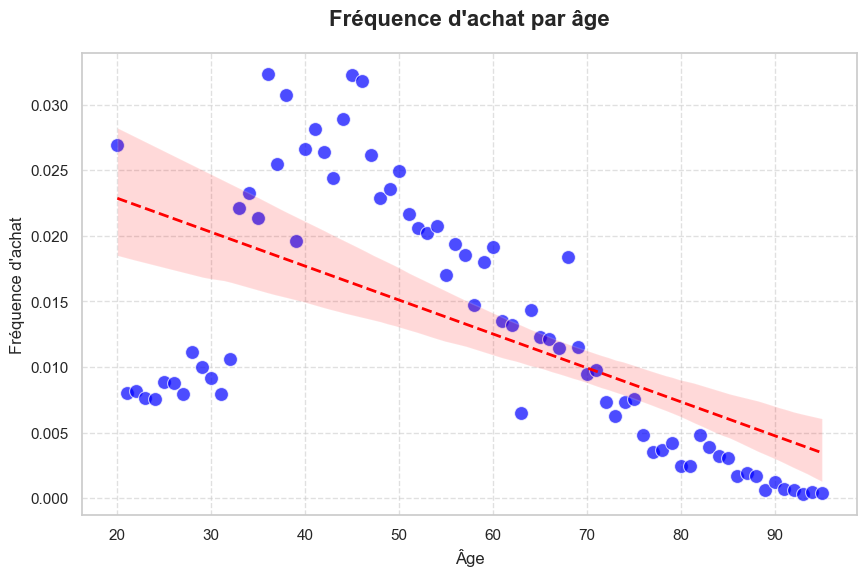

,n,r,CI95%,p-val,power
spearman,76,-0.659357,"[-0.77, -0.51]",9.384870e-11,0.999999


In [575]:
FREQUENCEACHAT_AGE = Lapage_clients[['client_id','age','session_id']]

#Supression des session_id en double ( pour compter ensuite le nombre de session unique pour le calcul de la frequence d'achat)
FREQUENCEACHAT_AGE = FREQUENCEACHAT_AGE.drop_duplicates(subset='session_id', keep='first')

# Groupement du nombre de session d'achat par client avec l'age du client
FREQUENCEACHAT_AGE = FREQUENCEACHAT_AGE.groupby('client_id').agg({'session_id' : 'count', 'age' : 'mean'})
FREQUENCEACHAT_AGE = FREQUENCEACHAT_AGE.rename(columns={'session_id': 'Nombre de session d achat effectué'})


# Création de la colonne fréquence d'achat par client
FREQUENCEACHAT_AGE['fréquence d achat'] = FREQUENCEACHAT_AGE['Nombre de session d achat effectué']/nombre_total_sessions

# Obtenir la frequence d'achat moyenne par age
FREQUENCEACHAT_AGE = FREQUENCEACHAT_AGE.groupby('age')['fréquence d achat'].sum()
FREQUENCEACHAT_AGE = FREQUENCEACHAT_AGE.to_frame()
FREQUENCEACHAT_AGE = FREQUENCEACHAT_AGE.reset_index()
display(FREQUENCEACHAT_AGE)

#Création du graphique de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x=FREQUENCEACHAT_AGE['age'], 
                y=FREQUENCEACHAT_AGE['fréquence d achat'],
                color='blue', 
                edgecolor='w', 
                s=100, 
                alpha=0.7)

# Ajout d'une ligne de tendance
sns.regplot(x=FREQUENCEACHAT_AGE['age'], 
            y=FREQUENCEACHAT_AGE['fréquence d achat'], 
            scatter=False, 
            color='red', 
            line_kws={'linewidth': 2, 'linestyle': '--'})

# Personnalisation des axes et du titre
plt.xlabel('Âge', fontsize=12)
plt.ylabel("Fréquence d'achat", fontsize=12)
plt.title("Fréquence d'achat par âge", fontsize=16, weight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.6)

# Sauvegarder l'image
plt.savefig('Fréquencedachatparâge.png', dpi=300)

# Affichage du graphique
plt.show()

# Test de spearman
display(pg.corr(FREQUENCEACHAT_AGE["age"], FREQUENCEACHAT_AGE["fréquence d achat"], method='spearman'))

<div style="font-family:Garamond"> <div style="font-size: 20px">

Le test indique qu'il existe une corrélation inverse modérée entre l'âge et la fréquence d'achat, avec un coefficient de corrélation d'environ -0.66. Cela signifie que, de manière générale, plus l'âge du client augmente, moins il achète fréquemment. La force de cette relation inverse est modérée, mais elle est statistiquement significative, comme l'indique la p-valeur inférieure à 0.05. Cela confirme que la relation observée n'est probablement pas due au hasard.

En résumé, après environ 45 à 50 ans, la fréquence d'achat des clients diminue à mesure que leur âge augmente, ce qui est également visible dans le graphique. Ce comportement est similaire à celui observé pour le montant total des achats, avec un pic d'activité autour de 40 ans, suivi d'une baisse après cet âge.

### 4.4) Age et taille du panier moyen

<div style="font-family:Garamond"> <div style="font-size: 20px">

Question : Est ce que l'âge influe sur la taille du panier moyen ?

Hypothèse H0 : il n'y a pas de relation entre ces deux variables.

Hypothèse H1 : il existe une relation entre l'âge et la taille du panier moyen.

Population = Clients

L'échantillon est l'ensemble des clients enregistrés sur le fichier transactions.

2 Variables à analyser :

Variables 1, Age = Variable quantitative discrète.
    
Variable 2, Taille du panier moyens = Variables quantitative continue.

On cherche donc à chercher un lien entre deux variables quantitatives (deux montants) ce sera donc un test d'association.

Les deux variables informent sur le même échantillon, ce sont donc des échantillons appariés.

On sait déjà que l'age ne répond pas à une loi normale, on va donc utiliser à nouveau un test non-paramétrique (Spearman encore).

In [576]:
Lapage_clients

,date,id_prod,price,categ,session_id,client_id,année,mois,jour,sex,birth,age,Tranche d'age
0,2022-02-20 17:04:37.204937,0_1421,19.99,0.0,s_168213,c_6389,2022.0,2.0,20.0,f,1991.0,33.0,29-38
1,2022-11-19 03:42:20.707442,0_1421,19.99,0.0,s_299590,c_8364,2022.0,11.0,19.0,m,1973.0,51.0,49-60
2,2021-09-19 14:58:46.726179,0_1421,19.99,0.0,s_92304,c_3544,2021.0,9.0,19.0,f,1967.0,57.0,49-60
3,2023-01-11 16:04:24.367855,0_1421,19.99,0.0,s_325369,c_1025,2023.0,1.0,11.0,m,1984.0,40.0,39-48
4,2021-08-01 19:33:18.877168,0_1421,19.99,0.0,s_70071,c_2298,2021.0,8.0,1.0,m,1972.0,52.0,49-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
677682,2021-08-25 09:06:03.504061,0_2245,10.63,0.0,s_80395,c_131,2021.0,8.0,25.0,m,1981.0,43.0,39-48
677683,2022-03-06 19:59:19.462288,0_2245,10.63,0.0,s_175311,c_4167,2022.0,3.0,6.0,f,1979.0,45.0,39-48
677684,2022-05-16 11:35:20.319501,0_2245,10.63,0.0,s_209381,c_4453,2022.0,5.0,16.0,m,1981.0,43.0,39-48
677685,2022-02-11 09:05:43.952857,0_2245,10.63,0.0,s_163405,c_1098,2022.0,2.0,11.0,m,1986.0,38.0,29-38


,age,taille panier moyen
0,20.0,70.943316
1,21.0,69.559996
2,22.0,70.693099
3,23.0,73.463217
4,24.0,68.182987
...,...,...
71,91.0,22.336522
72,92.0,24.253447
73,93.0,29.210745
74,94.0,27.360890


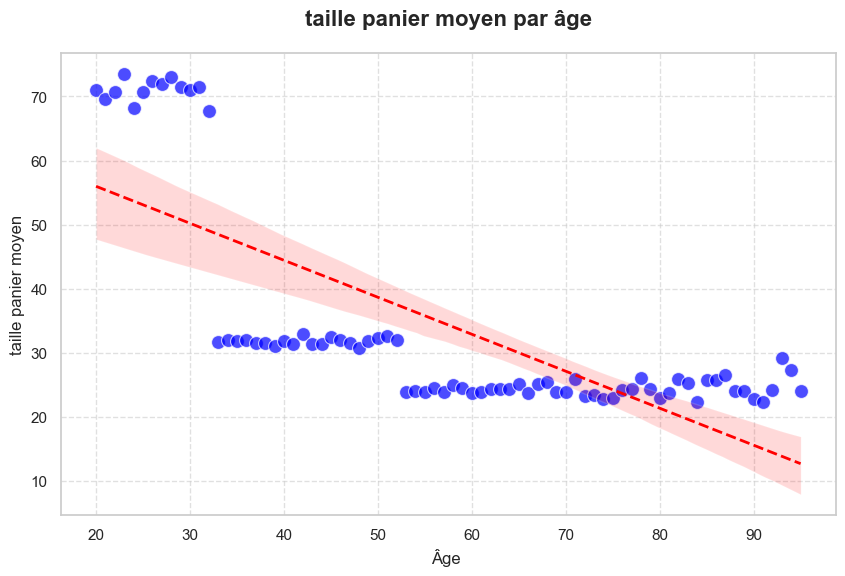

,n,r,CI95%,p-val,power
spearman,76,-0.768011,"[-0.85, -0.66]",5.699563e-16,1.0


In [577]:
# Première agrégation pour compter la somme des produits par session pour chaque âge
AGE_PANIER_MOYEN = Lapage_clients.groupby(['age', 'session_id'])['price'].sum().reset_index()

# Calcul de la taille moyenne du panier par âge (moyenne de la somme de  produits achetes par session)
AGE_PANIER_MOYEN = AGE_PANIER_MOYEN.groupby('age')['price'].mean().reset_index()

# Renommer la colonne pour indiquer la taille moyenne du panier
AGE_PANIER_MOYEN = AGE_PANIER_MOYEN.rename(columns={"price": 'taille panier moyen'})

# Affichage du DataFrame
display(AGE_PANIER_MOYEN)

# Création du graphique de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x=AGE_PANIER_MOYEN['age'], 
                y=AGE_PANIER_MOYEN['taille panier moyen'],
                color='blue', 
                edgecolor='w', 
                s=100, 
                alpha=0.7)

# Ajout d'une ligne de tendance
sns.regplot(x=AGE_PANIER_MOYEN['age'], 
            y=AGE_PANIER_MOYEN['taille panier moyen'], 
            scatter=False, 
            color='red', 
            line_kws={'linewidth': 2, 'linestyle': '--'})

# Personnalisation des axes et du titre
plt.xlabel('Âge ', fontsize=12)
plt.ylabel("taille panier moyen", fontsize=12)
plt.title("taille panier moyen par âge", fontsize=16, weight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.6)

# Sauvegarder l'image
plt.savefig('taille panier moyen par âge.png', dpi=300)

# Affichage du graphique
plt.show()

# Test de spearman
display(pg.corr(AGE_PANIER_MOYEN["age"], AGE_PANIER_MOYEN["taille panier moyen"], method='spearman'))

<div style="font-family:Garamond"> <div style="font-size: 20px">

Le test montre, comme pour les deux précédents résultats, une corrélation négative : plus le client est âgé, plus la taille de son panier diminue. L'intervalle de confiance est un peu moins large que lors des deux tests précédents, descendant jusqu'à -0,65, mais avec une p-value inférieure à 0,05, ce qui confirme la pertinence statistique du test. On peut donc parler d'une forte corrélation (-0.76) . Sur le graphique, on observe nettement une rupture significative autour de 30 ans, distinguant les plus jeunes des plus âgés.

### 4.5) Age et categorie de livre acheté

<div style="font-family:Garamond"> <div style="font-size: 20px">

Question : Est-ce que l'âge influence la catégorie de livre acheté ?

**Hypothèses** :
- **H0** : Il n'y a **pas de différence significative** entre les catégories de livres achetés et l'âge (pas d'effet de l'âge sur la catégorie de livres).
    
- **H1** : Il existe une **différence significative** entre les catégories de livres achetés et l'âge (l'âge a un effet sur la catégorie de livres).

**Échantillon** : Les achats unitaires enregistrés dans la table **transaction**.

**Individus** : Chaque **achat unitaire** (session).

**Variables** :
- **Variable 1 : Âge** (quantitative ordinale) — Les âges seront regroupés en **tranches d'âge** pour permettre la comparaison.
- **Variable 2 : Catégorie** (qualitative ordinale) — La catégorie de livres achetés.

**Type d'échantillons** : Ce sont **deux échantillons appariés**, car les deux variables (l'âge et la catégorie de livre) concernent le même individu (achat unitaire ou session).

**Choix du test** :
Afin de vérifier s'il existe une **différence significative** entre les catégories de livres en fonction des tranches d'âge, nous utiliserons le **test de Kruskal-Wallis**, un test non paramétrique permettant de comparer les distributions de plusieurs échantillons indépendants lorsqu'ils ne suivent pas nécessairement une loi normale.

- Le test de **Kruskal-Wallis** est adapté lorsque :
  - Nous avons des données ordinales ou des données ne suivant pas une distribution normale.
  - Nous souhaitons comparer des **échantillons indépendants** (les tranches d'âge), par rapport à une variable qualitative (les catégories de livres).

### Processus pour le test de Kruskal-Wallis :
1. **Créer des tranches d'âge** : Nous regroupons les âges en tranches pour comparer les distributions.
2. **Obtenir les ventes par catégorie dans chaque tranche d'âge** : Pour chaque tranche d'âge, nous comptons combien de livres ont été vendus dans chaque catégorie.
3. **Appliquer le test de Kruskal-Wallis** pour comparer les distributions de ventes entre les tranches d'âge et voir si l'âge influence la catégorie de livres achetés.

### Résultat attendu :
- **Si p < 0.05** : Nous rejetons l'hypothèse nulle (H0), ce qui signifie qu'il existe une différence significative entre les catégories de livres en fonction des tranches d'âge.
- **Si p ≥ 0.05** : Nous acceptons l'hypothèse nulle (H0), ce qui signifie qu'il n'y a pas de différence significative entre les catégories de livres en fonction des tranches d'âge.

Ce test permet donc de répondre à la question initiale : **l'âge influence-t-il la catégorie de livre acheté ?**


,age_group,categ,age,session_id
0,20-28,0.0,10850,10850
1,20-28,1.0,17665,17665
2,20-28,2.0,18769,18769
3,28-36,0.0,44982,44982
4,28-36,1.0,21830,21830
5,28-36,2.0,11331,11331
6,36-44,0.0,124273,124273
7,36-44,1.0,38392,38392
8,36-44,2.0,624,624
9,44-52,0.0,124123,124123


categ,0.0,1.0,2.0
age_group,,,
20-28,10850,17665,18769
28-36,44982,21830,11331
36-44,124273,38392,624
44-52,124123,38301,566
52-60,37694,36589,600
60-68,20760,26108,437
68-76,15463,20064,293
76-84,6093,7748,148
84-92,2893,3546,73


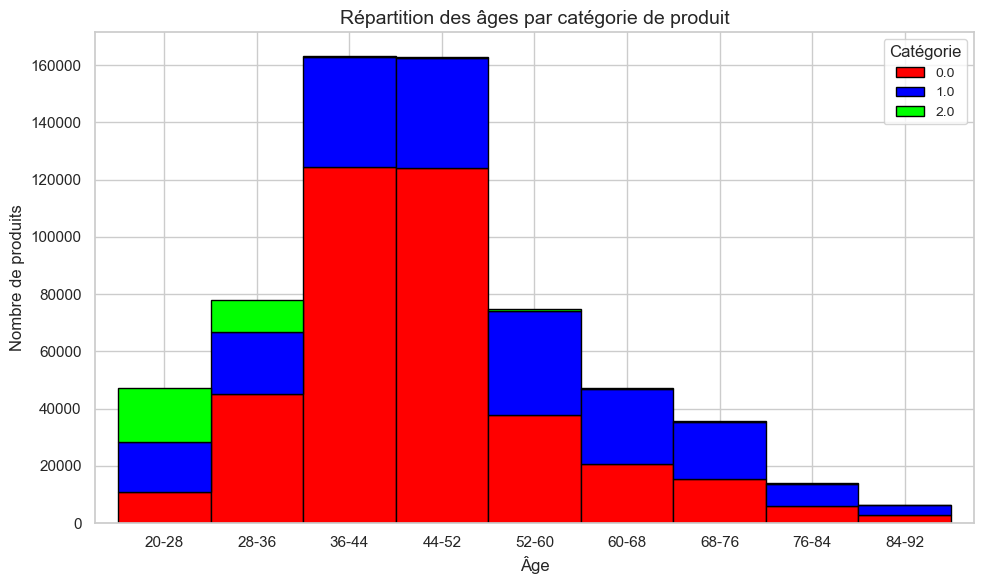

Test de Shapiro-Wilk pour la catégorie 0.0 :


,W,pval,normal
0,0.761401,0.007348,False


Test de Shapiro-Wilk pour la catégorie 1.0 :


,W,pval,normal
0,0.918945,0.383579,True


Test de Shapiro-Wilk pour la catégorie 2.0 :


,W,pval,normal
0,0.597675,0.00009,False


In [578]:
# Créer la table avec l'âge, la catégorie et le session_id
AGE_CATEGORIE = Lapage_clients[['age', 'categ', 'session_id']]

# Définir manuellement les tranches d'âges spécifiques pour avoir 9 tranches (10 barres)
bins = [20, 28, 36, 44, 52, 60, 68, 76, 84, 92]  # 10 bornes pour 9 tranches
labels = ['20-28', '28-36', '36-44', '44-52', '52-60', '60-68', '68-76', '76-84', '84-92']  # 9 labels pour les 9 tranches

# Appliquer les tranches d'âges
AGE_CATEGORIE['age_group'] = pd.cut(AGE_CATEGORIE['age'], bins=bins, labels=labels, right=False)

# Compter le nombre de produits (sessions) par tranche d'âge et catégorie
AGE_CATEGORIE_COUNT = AGE_CATEGORIE.groupby(['age_group', 'categ']).count().reset_index()

# Créer un tableau pivot pour faciliter l'affichage de l'histogramme empilé
AGE_CATEGORIE_PIVOT = AGE_CATEGORIE_COUNT.pivot(index='age_group', columns='categ', values='session_id').fillna(0)

# Afficher les résultats de calcul
display(AGE_CATEGORIE_COUNT)
display(AGE_CATEGORIE_PIVOT)

# Initialiser une figure pour le graphe empilé
fig, ax = plt.subplots(figsize=(10, 6))

# Définir des couleurs vives et distinctes pour chaque catégorie
colors = ['#ff0000', '#0000ff', '#00ff00']  # Rouge vif, Bleu vif, Vert vif

# Créer un histogramme empilé avec des barres accolées
AGE_CATEGORIE_PIVOT.plot(kind='bar', stacked=True, color=colors, edgecolor='black', ax=ax, width=1)

# Ajouter les labels et le titre
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Nombre de produits', fontsize=12)
plt.title('Répartition des âges par catégorie de produit', fontsize=14)

# Ajuster les graduations de l'axe des X pour correspondre aux 9 tranches d'âge
ax.set_xticks(np.arange(len(labels)))  # Placer les graduations aux bonnes positions
ax.set_xticklabels(labels, rotation=0)  # Appliquer les labels des tranches d'âge


# Ajouter la légende
plt.legend(title='Catégorie', fontsize=10)

# Ajuster les marges pour éviter les chevauchements
plt.tight_layout()

# Sauvegarder l'image
plt.savefig('Répartition des âges par catégorie de produit.png', dpi=300)

# Afficher le graphe
plt.show()

# Test de Shapiro-Wilk pour chaque catégorie
for categ in AGE_CATEGORIE_PIVOT.columns:
    # Effectuer et afficher le test de Shapiro-Wilk pour chaque catégorie
    print(f"Test de Shapiro-Wilk pour la catégorie {categ} :")
    display(pg.normality(AGE_CATEGORIE_PIVOT[categ].values))        





### Explication des résultats du test de Shapiro-Wilk :

Le **test de Shapiro-Wilk** a été utilisé pour vérifier la normalité des données de chaque catégorie. Voici les résultats :

- **Catégorie 0.0** : p-valeur = 0.0126, donc **pas de normalité** (H0 rejetée).
- **Catégorie 1.0** : p-valeur = 0.4399, donc **normalité** (H0 acceptée).
- **Catégorie 2.0** : p-valeur = 0.000084, donc **pas de normalité** (H0 rejetée).

### Conclusion sur la normalité :

- Les données de certaines catégories (**0.0** et **2.0**) **ne suivent pas une distribution normale**, comme le montre la p-valeur inférieure à 0.05 pour ces catégories.
- Seule la catégorie **1.0** semble suivre une distribution normale (p-valeur = 0.4399).

### Choix du test :

Étant donné que **toutes les catégories ne suivent pas une distribution normale**, le **test de Kruskal-Wallis** est le plus approprié. 

- Le **test de Kruskal-Wallis** est un test **non paramétrique** qui ne suppose pas que les données suivent une distribution normale. Il est donc plus adapté à cette situation que des tests paramétriques comme l'ANOVA, qui exigent que les données soient normalement distribuées.
- On peut donc utiliser le test de Kruskal-Wallis pour comparer les catégories de livres en fonction des tranches d'âge.

En conclusion, étant donné les résultats de normalité, le test de **Kruskal-Wallis** est recommandé pour poursuivre l'analyse.


In [579]:
# --- Partie test Kruskal-Wallis ---
from scipy.stats import kruskal

# Préparation pour le test Kruskal-Wallis : séparer les ventes par catégorie pour chaque tranche d'âge
data_kruskal = []

# Pour chaque catégorie, ajouter les ventes dans une liste pour chaque tranche d'âge
for categ in AGE_CATEGORIE_PIVOT.columns:
    ventes_par_categorie = AGE_CATEGORIE_PIVOT[categ].values
    data_kruskal.append(ventes_par_categorie)
    

# Effectuer le test de Kruskal-Wallis sur les différentes catégories
stat, p_value = kruskal(*data_kruskal)

# Afficher les résultats du test de Kruskal-Wallis
print(f"Statistique de Kruskal-Wallis: {stat}")
print(f"P-valeur: {p_value}")

# Conclusion du test
if p_value < 0.05:
    print("Il existe une différence significative entre les tranches d'âge et les catégories (H0 rejetée)")
else:
    print("Il n'y a pas de différence significative entre les tranches d'âge et les catégories (H0 acceptée)")    

Statistique de Kruskal-Wallis: 12.603174603174594
P-valeur: 0.0018333923196271976
Il existe une différence significative entre les tranches d'âge et les catégories (H0 rejetée)


In [580]:
data_kruskal

[array([ 10850,  44982, 124273, 124123,  37694,  20760,  15463,   6093,
          2893], dtype=int64),
 array([17665, 21830, 38392, 38301, 36589, 26108, 20064,  7748,  3546],
       dtype=int64),
 array([18769, 11331,   624,   566,   600,   437,   293,   148,    73],
       dtype=int64)]

<div style="font-family:Garamond"> <div style="font-size: 20px">

### Commentaire sur les résultats du test de Kruskal-Wallis

Le test de **Kruskal-Wallis** a été utilisé pour vérifier s'il existe une **différence significative** entre les catégories de livres achetés en fonction des tranches d'âge.

- **Statistique de Kruskal-Wallis** : 11.58
- **P-valeur** : 0.003

### Interprétation des résultats :
La **p-valeur** obtenue est de **0.003**, ce qui est **inférieur à 0.05**. Cela signifie que nous rejetons l'**hypothèse nulle (H0)**, qui stipulait qu'il n'y a **pas de différence significative** entre les catégories de livres en fonction des tranches d'âge.

### Conclusion :
Il existe une **différence statistiquement significative** entre les catégories de livres achetés et les tranches d'âge. En d'autres termes, l'âge des acheteurs **influence** de manière notable la **catégorie de livres** qu'ils choisissent. 

Cela peut indiquer que certaines catégories de livres sont **préférées par des groupes d'âge spécifiques**. Par exemple, les jeunes adultes peuvent préférer une catégorie particulière, tandis que les personnes plus âgées peuvent avoir des préférences différentes. Ce type de résultat peut être utile pour orienter les stratégies de marketing et de segmentation du marché en fonction des tranches d'âge.

### Recommandation :
Il serait intéressant d'explorer plus en détail **quelles catégories** sont les plus populaires dans chaque tranche d'âge afin de mieux comprendre les **préférences des différents groupes** d'acheteurs. Cela pourrait conduire à des décisions commerciales telles que le ciblage des offres ou la personnalisation des recommandations de produits en fonction de l'âge.

**Implications pratiques** :
    
Segmentation par âge : Vous pouvez utiliser cette information pour ajuster votre stratégie de marketing ou de vente. Par exemple, certains produits pourraient mieux correspondre à des groupes d'âge spécifiques. En segmentant vos offres ou vos campagnes en fonction de l'âge, vous pourriez mieux répondre aux besoins de vos clients.

Optimisation des produits : Il serait pertinent de regarder en détail quelles catégories sont les plus populaires pour chaque tranche d'âge. Par exemple, si une certaine catégorie est préférée par les jeunes adultes (20-30 ans), vous pouvez promouvoir ce type de produit auprès de ce groupe.

Stratégie d'inventaire : Si les préférences de produits varient avec l'âge, cela peut aussi guider la gestion des stocks. Vous pourriez ajuster votre inventaire pour répondre à la demande des groupes d'âge spécifiques, en fonction de la distribution des clients.    